In [1]:
setwd('~/Downloads/proj/')

library(data.table)
library(edgeR)
library(EDASeq)
library(RUVSeq)
library(affycoretools)
library(ggplot2)
library(DESeq2)
library(pheatmap)
require(dplyr)
require(stringr)

#project directories, and libraries loaded

MM_cell_line = data.frame(fread("HMCL66_HTSeq_GENE_Counts_v2.txt"))
MM_patients = data.frame(fread("MMRF_CoMMpass_IA13a_E74GTF_HtSeq_Gene_Counts.txt"))

#reading and creating data frames from gene count data

head(MM_cell_line)
head(MM_patients)
length(MM_patients[2,])

#checking output head

Loading required package: limma
Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:limma’:

    plotMA

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, tab

Sample          GENE_NAME ALMC1_DJ_p27 ALMC2_DJ_p11 AMO1_DSMZ_p8
1 ENSG00000000003 TSPAN6       2            0          100        
2 ENSG00000000005 TNMD         1            0            0        
3 ENSG00000000419 DPM1      3949         4134         4795        
4 ENSG00000000457 SCYL3     1597         1513         2412        
5 ENSG00000000460 C1orf112  3072         1488         2193        
6 ENSG00000000938 FGR          0           22          701        
  ANBL6_DJ2_p13 COLO677_DSMZ_p8 Delta47_JCRB_p16 DP6_DJ_p7 EJM_DSMZ_p9 ⋯
1    2             0               0                2        88        ⋯
2    0             1               0                0         0        ⋯
3 8278          2262            2587             3607      2450        ⋯
4 1988          1530             926             1415       573        ⋯
5 4091          3208            1170             3614      1618        ⋯
6    5             2               4               89         4        ⋯
  RPMI8226_ATCC_p7 SKMM1_p6 SKMM2_DSMZ_p17 U266_ATCC_p8 UTMC2_p6 VP6_DJ_p5
1    2                0        0              0            0        0     
2    0                1        0              0            0        0     
3 2694             1247     3263           3044         3108     4538     
4  665              994      497           1611         1603     1375     
5 1472             1517     1346           2068         3128     1850     
6    0              125      777             50         1890     2315     
  XG1_p5 XG2_p5 XG6_p5 XG7_p6
1    0      0      2     114 
2    0      0      0       0 
3 7336   4430   9279   13828 
4 1426    893   1540    1660 
5 2522   2320    793     689 
6 1514      5   3776     847

GENE_ID         MMRF_2801_1_BM MMRF_2718_1_BM MMRF_2815_1_BM MMRF_1656_1_BM
1 ENSG00000000003   17            999             85              9          
2 ENSG00000000005    1              0              0              2          
3 ENSG00000000419 1495           3271           2303           1234          
4 ENSG00000000457  231            809            203           1208          
5 ENSG00000000460   87            319             31            183          
6 ENSG00000000938  318            105            119            190          
  MMRF_2461_1_BM MMRF_2531_2_PB MMRF_2057_1_BM MMRF_1910_1_BM MMRF_2089_2_BM ⋯
1  801             20             12             16              4           ⋯
2    3              0              0              0              0           ⋯
3 1896           4400           2013           1745           1698           ⋯
4  425           2793            710            922            853           ⋯
5   85            929            174            292            837           ⋯
6 2064           2952             12            351            498           ⋯
  MMRF_2379_1_BM MMRF_1474_1_BM MMRF_1641_1_BM MMRF_1978_2_BM MMRF_2795_1_BM
1    2            186           102             347            128          
2    0              0             0               0              0          
3 2459           1269           337            3347           1049          
4  734            771           327             392             90          
5  267            104           114             126             17          
6   46             14           303            2007             58          
  MMRF_2316_1_BM MMRF_2606_2_BM MMRF_2440_1_BM MMRF_2731_1_BM MMRF_1355_1_BM
1   17             11              3             18             6           
2    0              1              0              0             0           
3 2545           1625           1253           1905           683           
4  406            857            548            808           393           
5   67            196            141            199            55           
6   77           1037             11            174            22

[1] 893

In [2]:
ensembl_intersect = intersect(MM_cell_line$Sample, MM_patients$GENE_ID)

#finding genes in common and creating character vector of Ensembl Gene IDs

head(ensembl_intersect)

#checking output head

[1] "ENSG00000000003" "ENSG00000000005" "ENSG00000000419" "ENSG00000000457"
[5] "ENSG00000000460" "ENSG00000000938"

In [3]:
rownames(MM_cell_line) = MM_cell_line$Sample
rownames(MM_patients) = MM_patients$GENE_ID

#assigning rownames as ensembl gene IDs so as to be able to parse by ensembl Gene IDs

head(MM_cell_line)
head(MM_patients)

#checking output head

Sample          GENE_NAME ALMC1_DJ_p27 ALMC2_DJ_p11
ENSG00000000003 ENSG00000000003 TSPAN6       2            0        
ENSG00000000005 ENSG00000000005 TNMD         1            0        
ENSG00000000419 ENSG00000000419 DPM1      3949         4134        
ENSG00000000457 ENSG00000000457 SCYL3     1597         1513        
ENSG00000000460 ENSG00000000460 C1orf112  3072         1488        
ENSG00000000938 ENSG00000000938 FGR          0           22        
                AMO1_DSMZ_p8 ANBL6_DJ2_p13 COLO677_DSMZ_p8 Delta47_JCRB_p16
ENSG00000000003  100            2             0               0            
ENSG00000000005    0            0             1               0            
ENSG00000000419 4795         8278          2262            2587            
ENSG00000000457 2412         1988          1530             926            
ENSG00000000460 2193         4091          3208            1170            
ENSG00000000938  701            5             2               4            
                DP6_DJ_p7 EJM_DSMZ_p9 ⋯ RPMI8226_ATCC_p7 SKMM1_p6
ENSG00000000003    2        88        ⋯    2                0    
ENSG00000000005    0         0        ⋯    0                1    
ENSG00000000419 3607      2450        ⋯ 2694             1247    
ENSG00000000457 1415       573        ⋯  665              994    
ENSG00000000460 3614      1618        ⋯ 1472             1517    
ENSG00000000938   89         4        ⋯    0              125    
                SKMM2_DSMZ_p17 U266_ATCC_p8 UTMC2_p6 VP6_DJ_p5 XG1_p5 XG2_p5
ENSG00000000003    0              0            0        0         0      0  
ENSG00000000005    0              0            0        0         0      0  
ENSG00000000419 3263           3044         3108     4538      7336   4430  
ENSG00000000457  497           1611         1603     1375      1426    893  
ENSG00000000460 1346           2068         3128     1850      2522   2320  
ENSG00000000938  777             50         1890     2315      1514      5  
                XG6_p5 XG7_p6
ENSG00000000003    2     114 
ENSG00000000005    0       0 
ENSG00000000419 9279   13828 
ENSG00000000457 1540    1660 
ENSG00000000460  793     689 
ENSG00000000938 3776     847

GENE_ID         MMRF_2801_1_BM MMRF_2718_1_BM MMRF_2815_1_BM
ENSG00000000003 ENSG00000000003   17            999             85          
ENSG00000000005 ENSG00000000005    1              0              0          
ENSG00000000419 ENSG00000000419 1495           3271           2303          
ENSG00000000457 ENSG00000000457  231            809            203          
ENSG00000000460 ENSG00000000460   87            319             31          
ENSG00000000938 ENSG00000000938  318            105            119          
                MMRF_1656_1_BM MMRF_2461_1_BM MMRF_2531_2_PB MMRF_2057_1_BM
ENSG00000000003    9            801             20             12          
ENSG00000000005    2              3              0              0          
ENSG00000000419 1234           1896           4400           2013          
ENSG00000000457 1208            425           2793            710          
ENSG00000000460  183             85            929            174          
ENSG00000000938  190           2064           2952             12          
                MMRF_1910_1_BM MMRF_2089_2_BM ⋯ MMRF_2379_1_BM MMRF_1474_1_BM
ENSG00000000003   16              4           ⋯    2            186          
ENSG00000000005    0              0           ⋯    0              0          
ENSG00000000419 1745           1698           ⋯ 2459           1269          
ENSG00000000457  922            853           ⋯  734            771          
ENSG00000000460  292            837           ⋯  267            104          
ENSG00000000938  351            498           ⋯   46             14          
                MMRF_1641_1_BM MMRF_1978_2_BM MMRF_2795_1_BM MMRF_2316_1_BM
ENSG00000000003 102             347            128             17          
ENSG00000000005   0               0              0              0          
ENSG00000000419 337            3347           1049           2545          
ENSG00000000457 327             392             90            406          
ENSG00000000460 114             126             17             67          
ENSG00000000938 303            2007             58             77          
                MMRF_2606_2_BM MMRF_2440_1_BM MMRF_2731_1_BM MMRF_1355_1_BM
ENSG00000000003   11              3             18             6           
ENSG00000000005    1              0              0             0           
ENSG00000000419 1625           1253           1905           683           
ENSG00000000457  857            548            808           393           
ENSG00000000460  196            141            199            55           
ENSG00000000938 1037             11            174            22

In [4]:
MM_cell_line = MM_cell_line[ensembl_intersect, -1]
MM_patients = MM_patients[ensembl_intersect, -1]

MM_patient_ids = data.frame(colnames(MM_patients))
MM_patients_new = filter(MM_patient_ids, str_extract(MM_patient_ids[,1], "_[0-9]_") == "_1_")
keepc = colnames(MM_patients) %in% MM_patients_new[,1]
MM_patients = MM_patients[,keepc]

MM_combined = cbind(MM_cell_line, MM_patients)

#filtering MM_cell_line and MM_patients to only those genes in common and taking out 
    #Gene name and ensembl ID columns, then combining them

head(MM_cell_line)
head(MM_patients)
head(MM_combined)
length(MM_patients[2,])

#checking output head

GENE_NAME ALMC1_DJ_p27 ALMC2_DJ_p11 AMO1_DSMZ_p8 ANBL6_DJ2_p13
ENSG00000000003 TSPAN6       2            0          100            2         
ENSG00000000005 TNMD         1            0            0            0         
ENSG00000000419 DPM1      3949         4134         4795         8278         
ENSG00000000457 SCYL3     1597         1513         2412         1988         
ENSG00000000460 C1orf112  3072         1488         2193         4091         
ENSG00000000938 FGR          0           22          701            5         
                COLO677_DSMZ_p8 Delta47_JCRB_p16 DP6_DJ_p7 EJM_DSMZ_p9
ENSG00000000003    0               0                2        88       
ENSG00000000005    1               0                0         0       
ENSG00000000419 2262            2587             3607      2450       
ENSG00000000457 1530             926             1415       573       
ENSG00000000460 3208            1170             3614      1618       
ENSG00000000938    2               4               89         4       
                FLAM76_JCRB_p10 ⋯ RPMI8226_ATCC_p7 SKMM1_p6 SKMM2_DSMZ_p17
ENSG00000000003    4            ⋯    2                0        0          
ENSG00000000005    0            ⋯    0                1        0          
ENSG00000000419 1388            ⋯ 2694             1247     3263          
ENSG00000000457 1013            ⋯  665              994      497          
ENSG00000000460 1507            ⋯ 1472             1517     1346          
ENSG00000000938    2            ⋯    0              125      777          
                U266_ATCC_p8 UTMC2_p6 VP6_DJ_p5 XG1_p5 XG2_p5 XG6_p5 XG7_p6
ENSG00000000003    0            0        0         0      0      2     114 
ENSG00000000005    0            0        0         0      0      0       0 
ENSG00000000419 3044         3108     4538      7336   4430   9279   13828 
ENSG00000000457 1611         1603     1375      1426    893   1540    1660 
ENSG00000000460 2068         3128     1850      2522   2320    793     689 
ENSG00000000938   50         1890     2315      1514      5   3776     847

MMRF_2801_1_BM MMRF_2718_1_BM MMRF_2815_1_BM MMRF_1656_1_BM
ENSG00000000003   17            999             85              9          
ENSG00000000005    1              0              0              2          
ENSG00000000419 1495           3271           2303           1234          
ENSG00000000457  231            809            203           1208          
ENSG00000000460   87            319             31            183          
ENSG00000000938  318            105            119            190          
                MMRF_2461_1_BM MMRF_2057_1_BM MMRF_1910_1_BM MMRF_2341_1_BM
ENSG00000000003  801             12             16             43          
ENSG00000000005    3              0              0              1          
ENSG00000000419 1896           2013           1745           2403          
ENSG00000000457  425            710            922           1203          
ENSG00000000460   85            174            292            478          
ENSG00000000938 2064             12            351            555          
                MMRF_2501_1_BM MMRF_1383_1_BM ⋯ MMRF_1731_1_BM MMRF_2799_1_BM
ENSG00000000003  594           693            ⋯    1             49          
ENSG00000000005    0             0            ⋯    0              0          
ENSG00000000419 1847           973            ⋯ 1751           2537          
ENSG00000000457 1160           587            ⋯  493            220          
ENSG00000000460  218           107            ⋯  104             50          
ENSG00000000938   37            21            ⋯ 3064             46          
                MMRF_2379_1_BM MMRF_1474_1_BM MMRF_1641_1_BM MMRF_2795_1_BM
ENSG00000000003    2            186           102             128          
ENSG00000000005    0              0             0               0          
ENSG00000000419 2459           1269           337            1049          
ENSG00000000457  734            771           327              90          
ENSG00000000460  267            104           114              17          
ENSG00000000938   46             14           303              58          
                MMRF_2316_1_BM MMRF_2440_1_BM MMRF_2731_1_BM MMRF_1355_1_BM
ENSG00000000003   17              3             18             6           
ENSG00000000005    0              0              0             0           
ENSG00000000419 2545           1253           1905           683           
ENSG00000000457  406            548            808           393           
ENSG00000000460   67            141            199            55           
ENSG00000000938   77             11            174            22

GENE_NAME ALMC1_DJ_p27 ALMC2_DJ_p11 AMO1_DSMZ_p8 ANBL6_DJ2_p13
ENSG00000000003 TSPAN6       2            0          100            2         
ENSG00000000005 TNMD         1            0            0            0         
ENSG00000000419 DPM1      3949         4134         4795         8278         
ENSG00000000457 SCYL3     1597         1513         2412         1988         
ENSG00000000460 C1orf112  3072         1488         2193         4091         
ENSG00000000938 FGR          0           22          701            5         
                COLO677_DSMZ_p8 Delta47_JCRB_p16 DP6_DJ_p7 EJM_DSMZ_p9
ENSG00000000003    0               0                2        88       
ENSG00000000005    1               0                0         0       
ENSG00000000419 2262            2587             3607      2450       
ENSG00000000457 1530             926             1415       573       
ENSG00000000460 3208            1170             3614      1618       
ENSG00000000938    2               4               89         4       
                FLAM76_JCRB_p10 ⋯ MMRF_1731_1_BM MMRF_2799_1_BM MMRF_2379_1_BM
ENSG00000000003    4            ⋯    1             49              2          
ENSG00000000005    0            ⋯    0              0              0          
ENSG00000000419 1388            ⋯ 1751           2537           2459          
ENSG00000000457 1013            ⋯  493            220            734          
ENSG00000000460 1507            ⋯  104             50            267          
ENSG00000000938    2            ⋯ 3064             46             46          
                MMRF_1474_1_BM MMRF_1641_1_BM MMRF_2795_1_BM MMRF_2316_1_BM
ENSG00000000003  186           102             128             17          
ENSG00000000005    0             0               0              0          
ENSG00000000419 1269           337            1049           2545          
ENSG00000000457  771           327              90            406          
ENSG00000000460  104           114              17             67          
ENSG00000000938   14           303              58             77          
                MMRF_2440_1_BM MMRF_2731_1_BM MMRF_1355_1_BM
ENSG00000000003    3             18             6           
ENSG00000000005    0              0             0           
ENSG00000000419 1253           1905           683           
ENSG00000000457  548            808           393           
ENSG00000000460  141            199            55           
ENSG00000000938   11            174            22

[1] 779

In [5]:
MM_cell_line_cpm = cpm(MM_cell_line[,-1])
MM_patients_cpm = cpm(MM_patients)

#getting counts per million for MM_cell_line, and MM_patients_cpm

head(MM_cell_line_cpm)
head(MM_patients_cpm)

#checking output head

ALMC1_DJ_p27 ALMC2_DJ_p11 AMO1_DSMZ_p8 ANBL6_DJ2_p13
ENSG00000000003  0.02834975   0.0000000    1.622395     0.02336384  
ENSG00000000005  0.01417488   0.0000000    0.000000     0.00000000  
ENSG00000000419 55.97658401  51.2687903   77.793863    96.70295153  
ENSG00000000457 22.63727644  18.7638316   39.132179    23.22366123  
ENSG00000000460 43.54521805  18.4537881   35.579133    47.79074350  
ENSG00000000938  0.00000000   0.2728383   11.372992     0.05840961  
                COLO677_DSMZ_p8 Delta47_JCRB_p16 DP6_DJ_p7   EJM_DSMZ_p9
ENSG00000000003  0.00000000      0.00000000       0.02991395  1.84606143
ENSG00000000005  0.01371330      0.00000000       0.00000000  0.00000000
ENSG00000000419 31.01947819     46.41255860      53.94981686 51.39602836
ENSG00000000457 20.98134466     16.61307664      21.16412278 12.02037725
ENSG00000000460 43.99225731     20.99060439      54.05451570 33.94235669
ENSG00000000938  0.02742659      0.07176275       1.33117097  0.08391188
                FLAM76_JCRB_p10 FR4_p6   ⋯ RPMI8226_ATCC_p7 SKMM1_p6   
ENSG00000000003  0.08252468      0.00000 ⋯  0.04066095       0.00000000
ENSG00000000005  0.00000000      0.00000 ⋯  0.00000000       0.02448497
ENSG00000000419 28.63606308     90.65327 ⋯ 54.77030556      30.53276243
ENSG00000000457 20.89937457     33.76204 ⋯ 13.51976733      24.33806403
ENSG00000000460 31.09117223     40.85974 ⋯ 29.92646243      37.14370537
ENSG00000000938  0.04126234     62.23506 ⋯  0.00000000       3.06062173
                SKMM2_DSMZ_p17 U266_ATCC_p8 UTMC2_p6 VP6_DJ_p5 XG1_p5   
ENSG00000000003  0.000000       0.000000     0.00000  0.00000    0.00000
ENSG00000000005  0.000000       0.000000     0.00000  0.00000    0.00000
ENSG00000000419 65.452450      53.700359    41.32766 65.86048  109.42511
ENSG00000000457  9.969313      28.420262    21.31539 19.95552   21.27047
ENSG00000000460 26.999386      36.482372    41.59361 26.84925   37.61861
ENSG00000000938 15.585827       0.882069    25.13169 33.59784   22.58310
                XG2_p5      XG6_p5       XG7_p6    
ENSG00000000003  0.00000000   0.03073836   1.460413
ENSG00000000005  0.00000000   0.00000000   0.000000
ENSG00000000419 58.79794048 142.61060806 177.145577
ENSG00000000457 11.85249681  23.66853502  21.265668
ENSG00000000460 30.79260088  12.18775862   8.826533
ENSG00000000938  0.06636336  58.03401832  10.850615

MMRF_2801_1_BM MMRF_2718_1_BM MMRF_2815_1_BM MMRF_1656_1_BM
ENSG00000000003  0.41571843    15.194298       1.9975817      0.18506125   
ENSG00000000005  0.02445403     0.000000       0.0000000      0.04112472   
ENSG00000000419 36.55876793    49.750299      54.1227124     25.37395378   
ENSG00000000457  5.64887986    12.304492       4.7706950     24.83933239   
ENSG00000000460  2.12750021     4.851833       0.7285298      3.76291211   
ENSG00000000938  7.77638007     1.596998       2.7966143      3.90684864   
                MMRF_2461_1_BM MMRF_2057_1_BM MMRF_1910_1_BM MMRF_2341_1_BM
ENSG00000000003  9.58358567     0.2422773      0.2571051      0.57555389   
ENSG00000000005  0.03589358     0.0000000      0.0000000      0.01338497   
ENSG00000000419 22.68474210    40.6420105     28.0405222     32.16409293   
ENSG00000000457  5.08492373    14.3347379     14.8156799     16.10212393   
ENSG00000000460  1.01698475     3.5130203      4.6921676      6.39801765   
ENSG00000000938 24.69478254     0.2422773      5.6402426      7.42866066   
                MMRF_2501_1_BM MMRF_1383_1_BM ⋯ MMRF_1731_1_BM MMRF_2799_1_BM
ENSG00000000003  7.5451838     20.2371987     ⋯  0.02036196     0.8435951    
ENSG00000000005  0.0000000      0.0000000     ⋯  0.00000000     0.0000000    
ENSG00000000419 23.4612029     28.4138446     ⋯ 35.65378598    43.6775686    
ENSG00000000457 14.7347024     17.1417541     ⋯ 10.03844460     3.7875700    
ENSG00000000460  2.7691079      3.1246468     ⋯  2.11764348     0.8608114    
ENSG00000000938  0.4699862      0.6132484     ⋯ 62.38903497     0.7919465    
                MMRF_2379_1_BM MMRF_1474_1_BM MMRF_1641_1_BM MMRF_2795_1_BM
ENSG00000000003  0.02949247     3.1089737     2.013385        2.8256961    
ENSG00000000005  0.00000000     0.0000000     0.000000        0.0000000    
ENSG00000000419 36.26098596    21.2112241     6.652067       23.1574629    
ENSG00000000457 10.82373473    12.8871976     6.454676        1.9868176    
ENSG00000000460  3.93724410     1.7383509     2.250254        0.3752878    
ENSG00000000938  0.67832670     0.2340088     5.980938        1.2803936    
                MMRF_2316_1_BM MMRF_2440_1_BM MMRF_2731_1_BM MMRF_1355_1_BM
ENSG00000000003  0.2622789      0.05961647     0.2925792      0.1861177    
ENSG00000000005  0.0000000      0.00000000     0.0000000      0.0000000    
ENSG00000000419 39.2646952     24.89981253    30.9646322     21.1863986    
ENSG00000000457  6.2638374     10.88994195    13.1335553     12.1907096    
ENSG00000000460  1.0336875      2.80197412     3.2346256      1.7060790    
ENSG00000000938  1.1879692      0.21859373     2.8282656      0.6824316

In [6]:
keep = rowSums(cpm(MM_combined[-1]) > 1) > 2
MM_combined.filtered = MM_combined[keep, ]
MM_patients_cpm = MM_patients_cpm[keep, ]
MM_patients = MM_patients[keep, ]
MM_cell_line = MM_cell_line[keep,]

#initial filtering of MM_combined to remove low count genes (genes with greater than 
    #1 million counts in more than 2 samples are kept)

head(keep)
head(MM_combined.filtered)

#checking output head

ENSG00000000003 ENSG00000000005 ENSG00000000419 ENSG00000000457 ENSG00000000460 
           TRUE           FALSE            TRUE            TRUE            TRUE 
ENSG00000000938 
           TRUE

GENE_NAME ALMC1_DJ_p27 ALMC2_DJ_p11 AMO1_DSMZ_p8 ANBL6_DJ2_p13
ENSG00000000003 TSPAN6       2            0          100            2         
ENSG00000000419 DPM1      3949         4134         4795         8278         
ENSG00000000457 SCYL3     1597         1513         2412         1988         
ENSG00000000460 C1orf112  3072         1488         2193         4091         
ENSG00000000938 FGR          0           22          701            5         
ENSG00000000971 CFH         11          207           24           21         
                COLO677_DSMZ_p8 Delta47_JCRB_p16 DP6_DJ_p7 EJM_DSMZ_p9
ENSG00000000003    0               0                2        88       
ENSG00000000419 2262            2587             3607      2450       
ENSG00000000457 1530             926             1415       573       
ENSG00000000460 3208            1170             3614      1618       
ENSG00000000938    2               4               89         4       
ENSG00000000971   18               8              685        12       
                FLAM76_JCRB_p10 ⋯ MMRF_1731_1_BM MMRF_2799_1_BM MMRF_2379_1_BM
ENSG00000000003    4            ⋯    1             49              2          
ENSG00000000419 1388            ⋯ 1751           2537           2459          
ENSG00000000457 1013            ⋯  493            220            734          
ENSG00000000460 1507            ⋯  104             50            267          
ENSG00000000938    2            ⋯ 3064             46             46          
ENSG00000000971   28            ⋯ 2566             27             13          
                MMRF_1474_1_BM MMRF_1641_1_BM MMRF_2795_1_BM MMRF_2316_1_BM
ENSG00000000003  186           102             128             17          
ENSG00000000419 1269           337            1049           2545          
ENSG00000000457  771           327              90            406          
ENSG00000000460  104           114              17             67          
ENSG00000000938   14           303              58             77          
ENSG00000000971    5            28              30             18          
                MMRF_2440_1_BM MMRF_2731_1_BM MMRF_1355_1_BM
ENSG00000000003    3             18             6           
ENSG00000000419 1253           1905           683           
ENSG00000000457  548            808           393           
ENSG00000000460  141            199            55           
ENSG00000000938   11            174            22           
ENSG00000000971 1680             56            10

In [7]:
MM_gene_names = MM_combined.filtered[, 1]
MM_combined.filtered = MM_combined.filtered[, -1]

#grabbing first colunmn of MM_combined.filtered (Gene_name), only those rows specified by ensembl intersect, 
    #removing Gene_name column from MM_combined.filtered

head(MM_gene_names)
head(MM_combined.filtered)

[1] "TSPAN6"   "DPM1"     "SCYL3"    "C1orf112" "FGR"      "CFH"

ALMC1_DJ_p27 ALMC2_DJ_p11 AMO1_DSMZ_p8 ANBL6_DJ2_p13
ENSG00000000003    2            0          100            2         
ENSG00000000419 3949         4134         4795         8278         
ENSG00000000457 1597         1513         2412         1988         
ENSG00000000460 3072         1488         2193         4091         
ENSG00000000938    0           22          701            5         
ENSG00000000971   11          207           24           21         
                COLO677_DSMZ_p8 Delta47_JCRB_p16 DP6_DJ_p7 EJM_DSMZ_p9
ENSG00000000003    0               0                2        88       
ENSG00000000419 2262            2587             3607      2450       
ENSG00000000457 1530             926             1415       573       
ENSG00000000460 3208            1170             3614      1618       
ENSG00000000938    2               4               89         4       
ENSG00000000971   18               8              685        12       
                FLAM76_JCRB_p10 FR4_p6 ⋯ MMRF_1731_1_BM MMRF_2799_1_BM
ENSG00000000003    4               0   ⋯    1             49          
ENSG00000000419 1388            3308   ⋯ 1751           2537          
ENSG00000000457 1013            1232   ⋯  493            220          
ENSG00000000460 1507            1491   ⋯  104             50          
ENSG00000000938    2            2271   ⋯ 3064             46          
ENSG00000000971   28               2   ⋯ 2566             27          
                MMRF_2379_1_BM MMRF_1474_1_BM MMRF_1641_1_BM MMRF_2795_1_BM
ENSG00000000003    2            186           102             128          
ENSG00000000419 2459           1269           337            1049          
ENSG00000000457  734            771           327              90          
ENSG00000000460  267            104           114              17          
ENSG00000000938   46             14           303              58          
ENSG00000000971   13              5            28              30          
                MMRF_2316_1_BM MMRF_2440_1_BM MMRF_2731_1_BM MMRF_1355_1_BM
ENSG00000000003   17              3             18             6           
ENSG00000000419 2545           1253           1905           683           
ENSG00000000457  406            548            808           393           
ENSG00000000460   67            141            199            55           
ENSG00000000938   77             11            174            22           
ENSG00000000971   18           1680             56            10

In [8]:
norm_pat = vst(as.matrix(round(MM_patients)))

keepi = apply(norm_pat, 1, IQR)

keepis = sort(keepi, decreasing = TRUE)

keepi = keepi %in% keepis[1:5000]

sum(keepi)

MM_combined.filtered = MM_combined.filtered[keepi, ]

head(MM_combined.filtered)

converting counts to integer mode


[1] 5000

ALMC1_DJ_p27 ALMC2_DJ_p11 AMO1_DSMZ_p8 ANBL6_DJ2_p13
ENSG00000000003    2            0          100            2         
ENSG00000000460 3072         1488         2193         4091         
ENSG00000000938    0           22          701            5         
ENSG00000000971   11          207           24           21         
ENSG00000001561 4226         4260         2735         1179         
ENSG00000002586 1070           65          215           13         
                COLO677_DSMZ_p8 Delta47_JCRB_p16 DP6_DJ_p7 EJM_DSMZ_p9
ENSG00000000003    0               0                2        88       
ENSG00000000460 3208            1170             3614      1618       
ENSG00000000938    2               4               89         4       
ENSG00000000971   18               8              685        12       
ENSG00000001561  721            1472             4159       980       
ENSG00000002586 3661               1               93         3       
                FLAM76_JCRB_p10 FR4_p6 ⋯ MMRF_1731_1_BM MMRF_2799_1_BM
ENSG00000000003    4               0   ⋯    1             49          
ENSG00000000460 1507            1491   ⋯  104             50          
ENSG00000000938    2            2271   ⋯ 3064             46          
ENSG00000000971   28               2   ⋯ 2566             27          
ENSG00000001561 1475             573   ⋯  472            399          
ENSG00000002586 4849               2   ⋯ 1285           1279          
                MMRF_2379_1_BM MMRF_1474_1_BM MMRF_1641_1_BM MMRF_2795_1_BM
ENSG00000000003    2           186            102            128           
ENSG00000000460  267           104            114             17           
ENSG00000000938   46            14            303             58           
ENSG00000000971   13             5             28             30           
ENSG00000001561 4997           804            136            197           
ENSG00000002586   35            48             79            162           
                MMRF_2316_1_BM MMRF_2440_1_BM MMRF_2731_1_BM MMRF_1355_1_BM
ENSG00000000003    17             3             18             6           
ENSG00000000460    67           141            199            55           
ENSG00000000938    77            11            174            22           
ENSG00000000971    18          1680             56            10           
ENSG00000001561  1055          1358           1394           717           
ENSG00000002586 13970            25             45           109

In [9]:
combined_annot = data.frame(colnames(MM_combined.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

#utilizing varaince stabilization normalization method, vst(), then creating new seqExpressionSet object, 
    #using normalized counts

converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

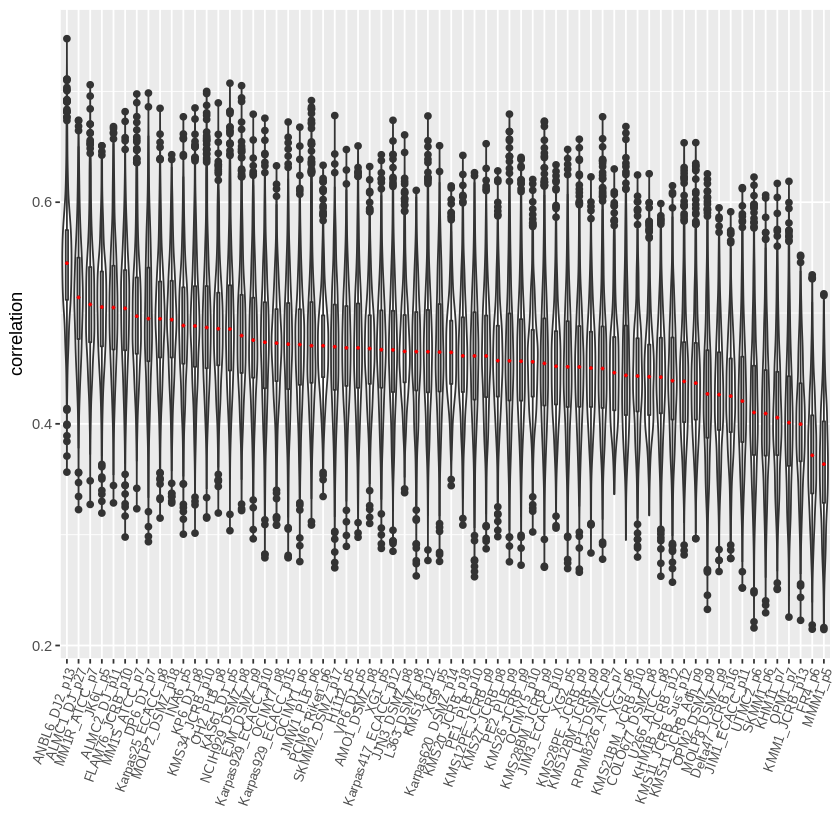

In [10]:
###### BASE ANALYSIS WITH ALL CELL LINES AND ALL NEWLY DIAGNOSED PATIENTS AND TOP 5000 GENES #####
setv = vst(as.matrix(round(MM_combined.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

In [11]:
#### DATA FOR TRANSLOCATIONS ####

MM_patients_trans = data.frame(fread("IA13a.structural.variants.annot.translocations.clean.maxHom0.8.minMap0.2.clonality.readRange10000bp.cnvRange2000bp.common.txt"))
MM_patient_trans_ids = MM_patients_trans[,'sample']

converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

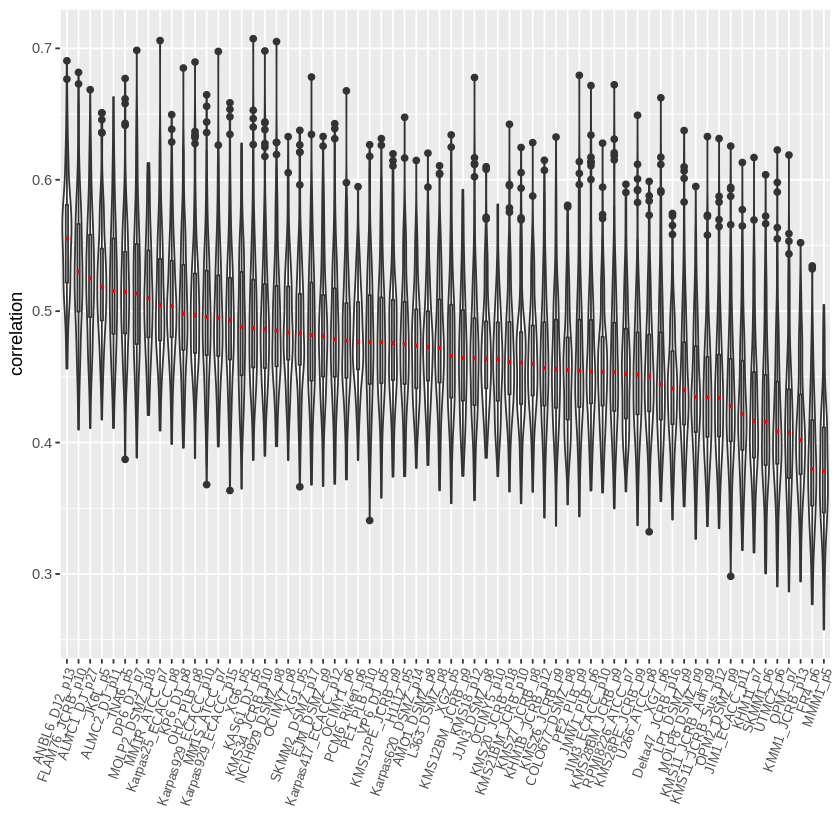

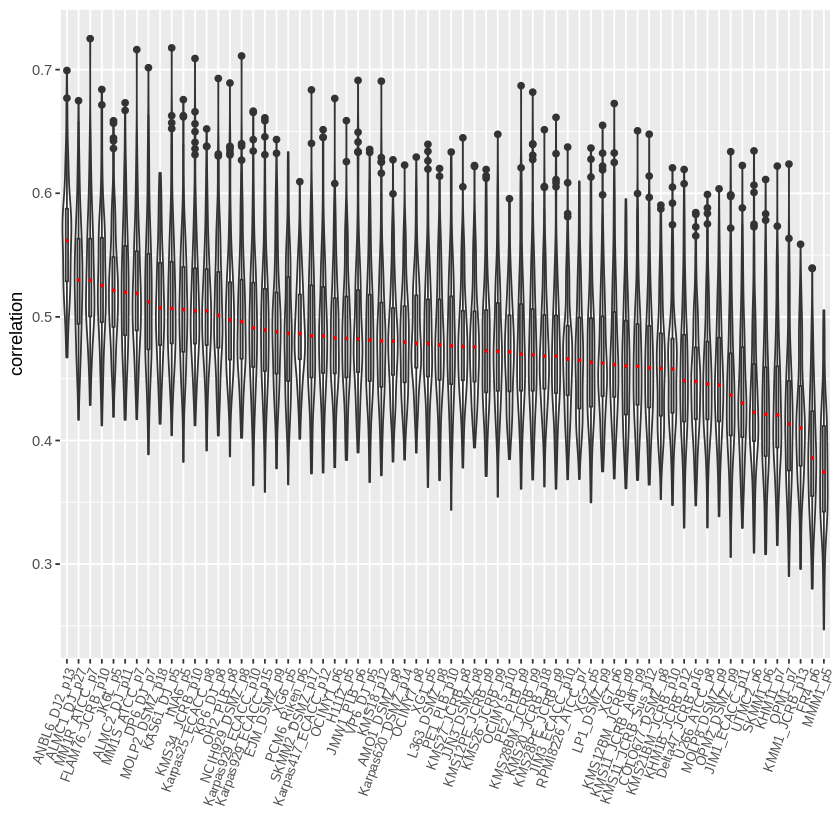

In [12]:
#### MYC translocation #####

keepMYC = as.logical(MM_patients_trans[,'t.MYC.'])
MM_patients_trans_MYC = MM_patient_trans_ids[keepMYC]
MM_patients_trans_MYC = unique(MM_patients_trans_MYC)
MM_patients_new_trans_MYC = filter(as.data.frame(MM_patients_trans_MYC),
                                   str_extract(as.data.frame(MM_patients_trans_MYC)[,1], "_[0-9]_") == "_1_")
keepcMYC = colnames(MM_patients) %in% MM_patients_new_trans_MYC[,1]

MM_patients_MYC = MM_patients[,keepcMYC]
MM_combined_MYC = cbind(MM_cell_line, MM_patients_MYC)
MM_combined_MYC.filtered = MM_combined_MYC[keepi, ]
MM_combined_MYC.filtered = MM_combined_MYC.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_MYC.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_MYC.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_MYC)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )


###########################################################################################
norm_pat_tMYC = norm_pat[, keepcMYC]
keepi_tMYC = apply(norm_pat_tMYC, 1, IQR)
keepis = sort(keepi_tMYC, decreasing = TRUE)
keepi_tMYC = keepi_tMYC %in% keepis[1:5000]

MM_patients_MYC = MM_patients[,keepcMYC]
MM_combined_MYC = cbind(MM_cell_line, MM_patients_MYC)
MM_combined_MYC.filtered = MM_combined_MYC[keepi_tMYC, ]
MM_combined_MYC.filtered = MM_combined_MYC.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_MYC.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_MYC.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_MYC)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )


###########################################################################################

converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

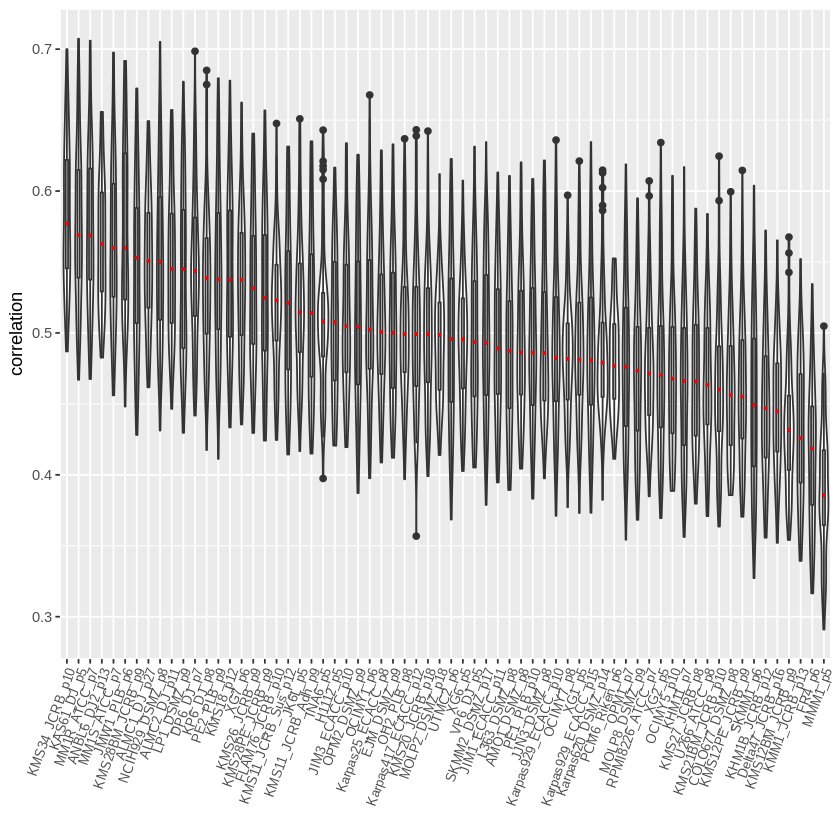

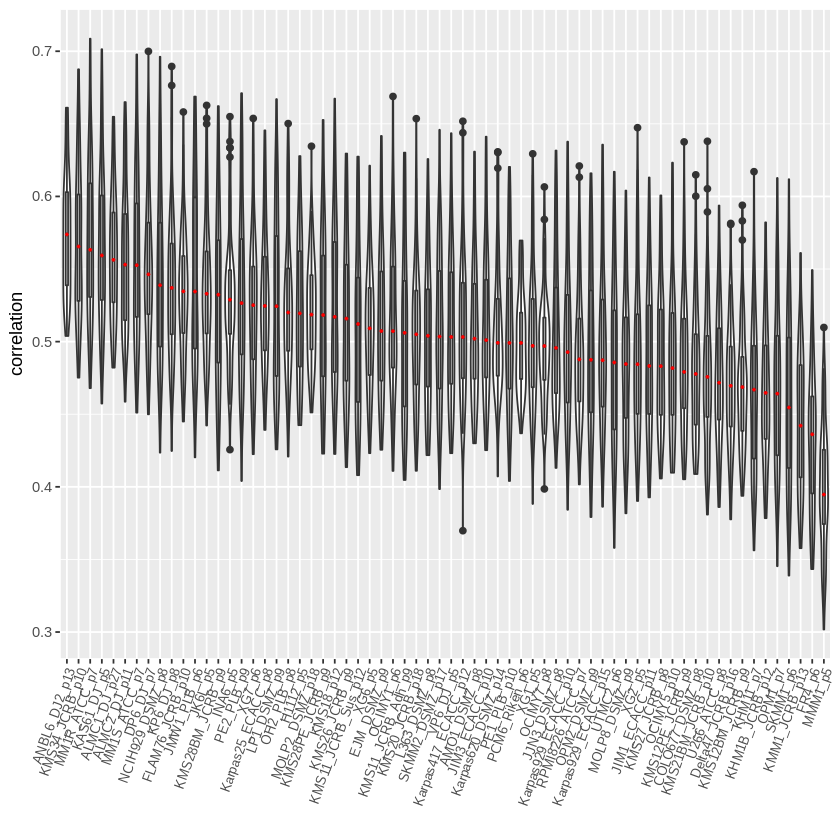

In [13]:
#### 414 translocation #####

keep414 = as.logical(MM_patients_trans[,'t.4.14.'])
MM_patients_trans_414 = MM_patient_trans_ids[keep414]
MM_patients_trans_414 = unique(MM_patients_trans_414)
MM_patients_new_trans_414 = filter(as.data.frame(MM_patients_trans_414),
                                   str_extract(as.data.frame(MM_patients_trans_414)[,1], "_[0-9]_") == "_1_")
keepc414 = colnames(MM_patients) %in% MM_patients_new_trans_414[,1]

MM_patients_414 = MM_patients[,keepc414]
MM_combined_414 = cbind(MM_cell_line, MM_patients_414)
MM_combined_414.filtered = MM_combined_414[keepi, ]
MM_combined_414.filtered = MM_combined_414.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_414.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_414.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_414)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )


###########################################################################################
norm_pat_t414 = norm_pat[, keepc414]
keepi_t414 = apply(norm_pat_t414, 1, IQR)
keepis = sort(keepi_t414, decreasing = TRUE)
keepi_t414 = keepi_t414 %in% keepis[1:5000]

MM_patients_414 = MM_patients[,keepc414]
MM_combined_414 = cbind(MM_cell_line, MM_patients_414)
MM_combined_414.filtered = MM_combined_414[keepi_t414, ]
MM_combined_414.filtered = MM_combined_414.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_414.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_414.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_414)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

###########################################################################################

converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

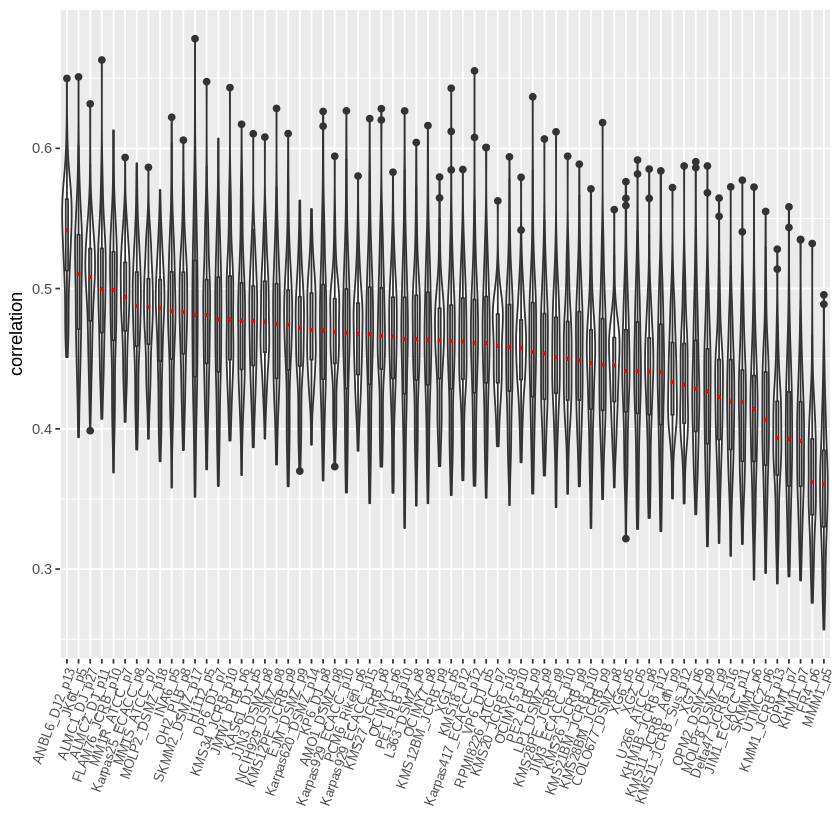

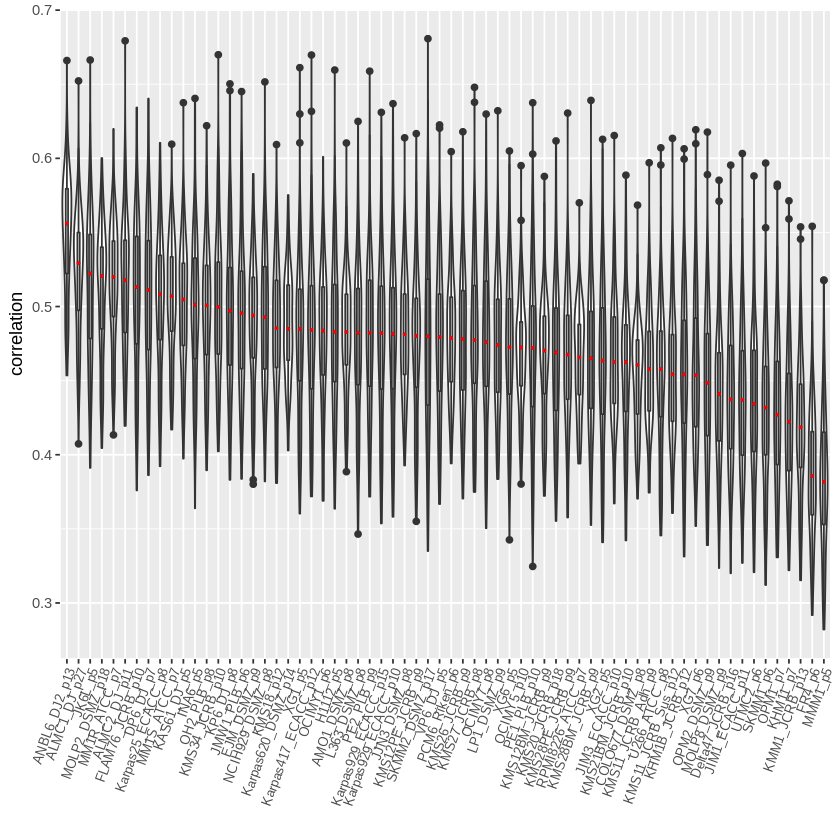

In [14]:
#### translocation 11:14 ######

keep1114 = as.logical(MM_patients_trans[,'t.11.14.'])
MM_patients_trans_1114 = MM_patient_trans_ids[keep1114]
MM_patients_trans_1114 = unique(MM_patients_trans_1114)
MM_patients_new_trans_1114 = filter(as.data.frame(MM_patients_trans_1114),
                                   str_extract(as.data.frame(MM_patients_trans_1114)[,1], "_[0-9]_") == "_1_")
keepc1114 = colnames(MM_patients) %in% MM_patients_new_trans_1114[,1]

MM_patients_1114 = MM_patients[,keepc1114]
MM_combined_1114 = cbind(MM_cell_line, MM_patients_1114)
MM_combined_1114.filtered = MM_combined_1114[keepi, ]
MM_combined_1114.filtered = MM_combined_1114.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_1114.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_1114.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_1114)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )
########################################################################################################

norm_pat_t1114 = norm_pat[, keepc1114]
keepi_t1114 = apply(norm_pat_t1114, 1, IQR)
keepis = sort(keepi_t1114, decreasing = TRUE)
keepi_t1114 = keepi_t1114 %in% keepis[1:5000]

MM_patients_1114 = MM_patients[,keepc1114]
MM_combined_1114 = cbind(MM_cell_line, MM_patients_1114)
MM_combined_1114.filtered = MM_combined_1114[keepi_t1114, ]
MM_combined_1114.filtered = MM_combined_1114.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_1114.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_1114.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_1114)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

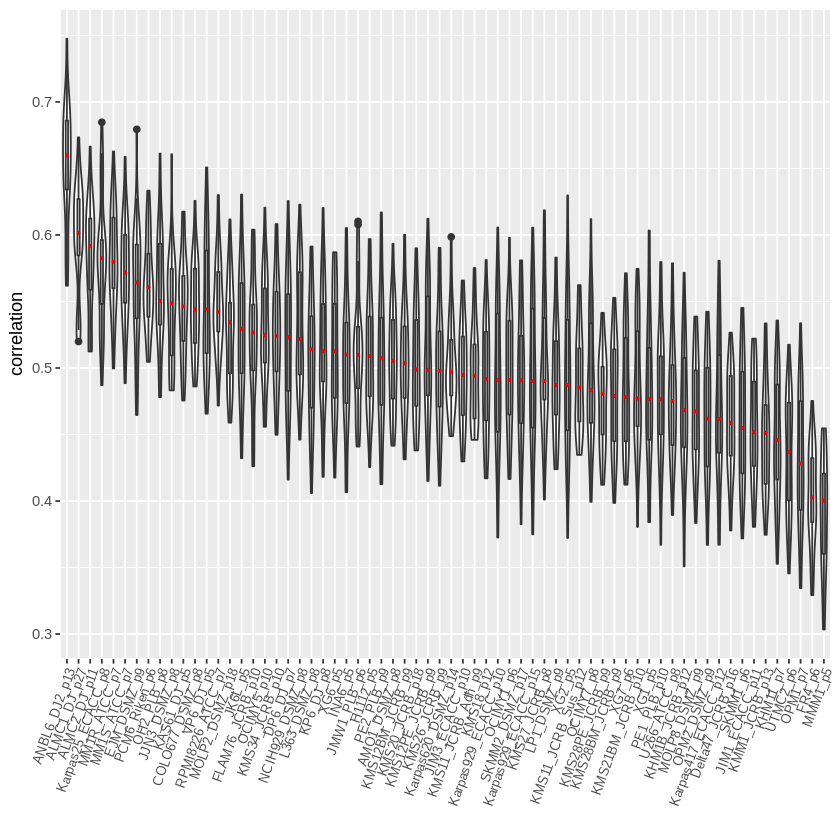

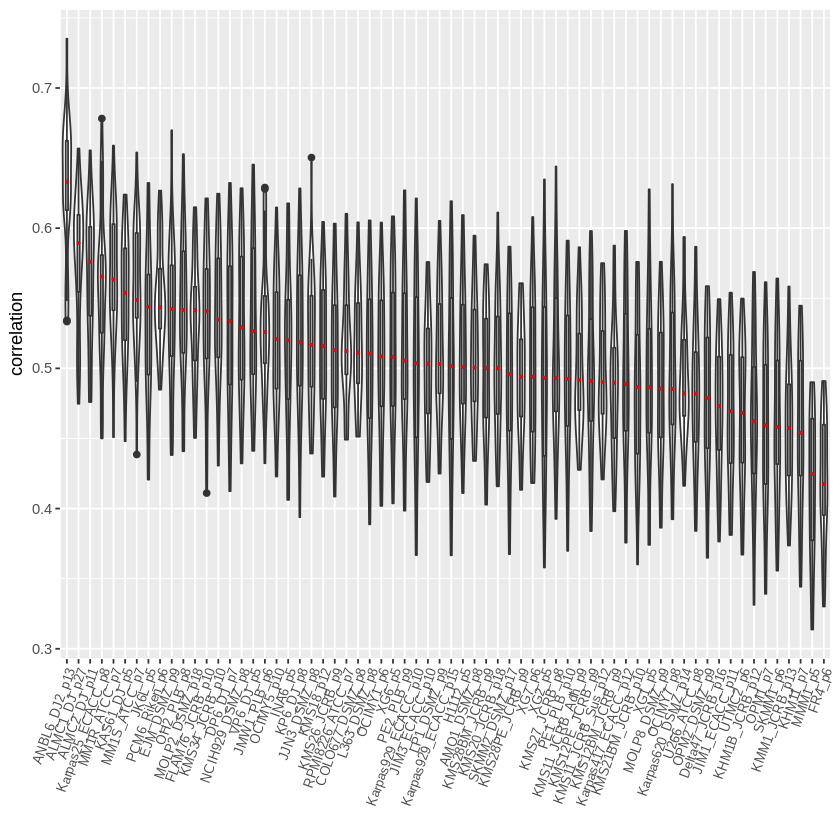

In [15]:
#### translocation 14:16 ######

keep1416 = as.logical(MM_patients_trans[,'t.14.16.'])
MM_patients_trans_1416 = MM_patient_trans_ids[keep1416]
MM_patients_trans_1416 = unique(MM_patients_trans_1416)
MM_patients_new_trans_1416 = filter(as.data.frame(MM_patients_trans_1416),
                                   str_extract(as.data.frame(MM_patients_trans_1416)[,1], "_[0-9]_") == "_1_")
keepc1416 = colnames(MM_patients) %in% MM_patients_new_trans_1416[,1]

MM_patients_1416 = MM_patients[,keepc1416]
MM_combined_1416 = cbind(MM_cell_line, MM_patients_1416)
MM_combined_1416.filtered = MM_combined_1416[keepi, ]
MM_combined_1416.filtered = MM_combined_1416.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_1416.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_1416.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_1416)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )
###############################################################################################

norm_pat_t1416 = norm_pat[, keepc1416]
keepi_t1416 = apply(norm_pat_t1416, 1, IQR)
keepis = sort(keepi_t1416, decreasing = TRUE)
keepi_t1416 = keepi_t1416 %in% keepis[1:5000]

MM_patients_1416 = MM_patients[,keepc1416]
MM_combined_1416 = cbind(MM_cell_line, MM_patients_1416)
MM_combined_1416.filtered = MM_combined_1416[keepi_t1416, ]
MM_combined_1416.filtered = MM_combined_1416.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_1416.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_1416.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_1416)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

In [16]:
#### Cell line info ####

MM_pat_mut = read.delim("MMRF_CoMMpass_IA13a_IGV_All_Canonical_Variants.mut", stringsAsFactors = F)

[1] 248

converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

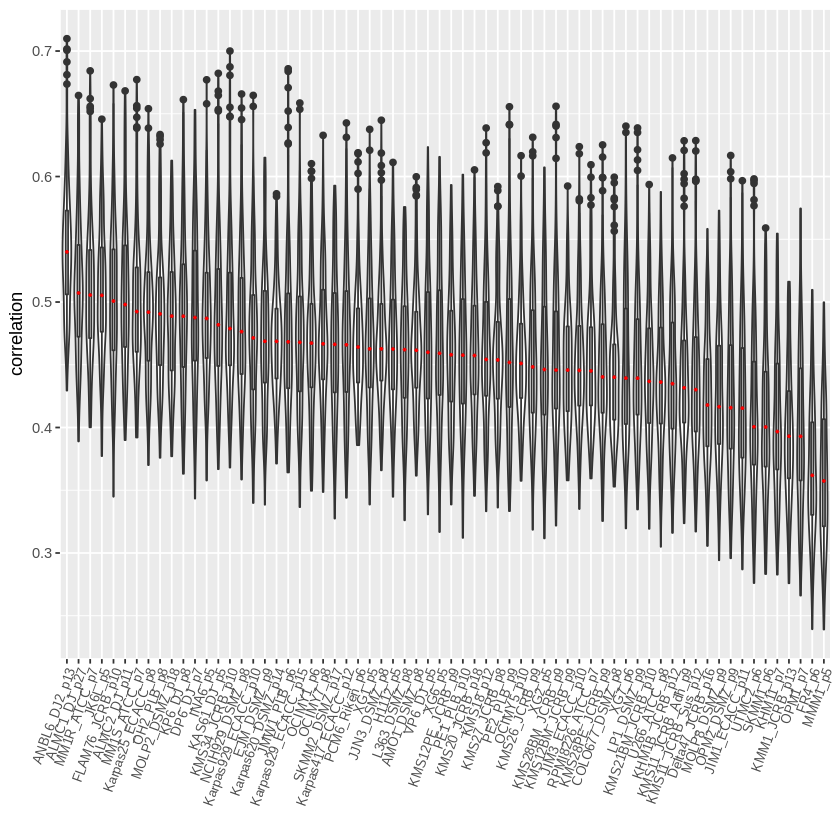

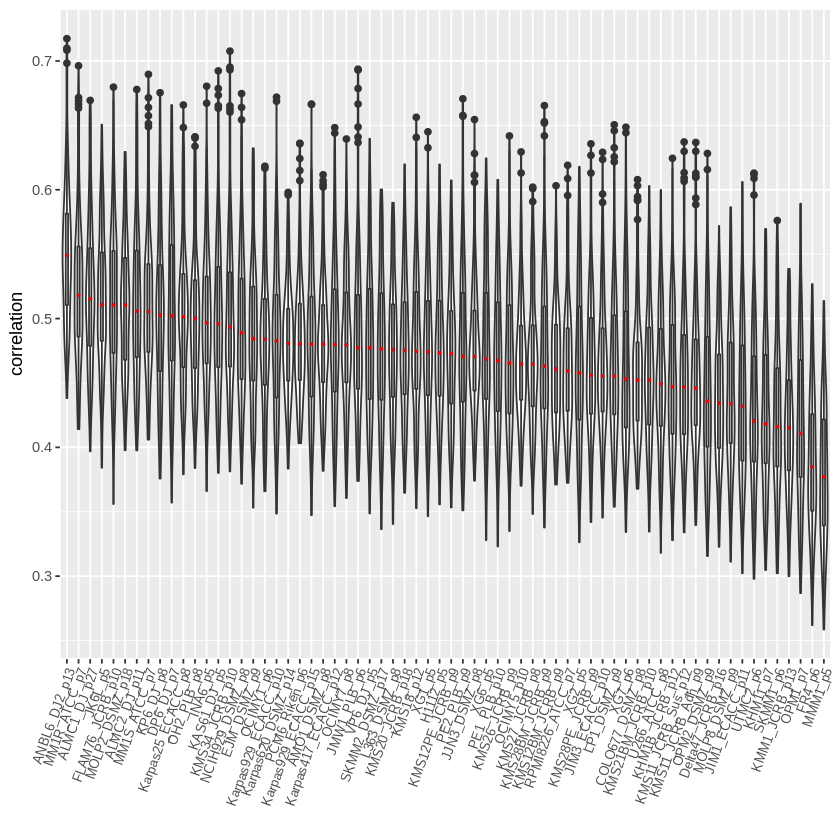

In [17]:
###### KRAS Mutations #########

KRAS_mut = filter(MM_pat_mut, GENE == "KRAS") %>%
  select(sample, EFFECT, HGVS_P, FEATURE) %>%
  filter(EFFECT == "missense_variant") %>%
  mutate(position = str_extract(HGVS_P, "[0-9]+")) %>%
  filter(position %in% c(12, 13, 61))

MM_pat_mut_KRAS = unique(KRAS_mut$sample)
length(MM_pat_mut_KRAS)
keep_KRAS = colnames(MM_patients) %in% MM_pat_mut_KRAS

MM_patients_KRAS = MM_patients[,keep_KRAS]
MM_combined_KRAS = cbind(MM_cell_line, MM_patients_KRAS)
MM_combined_KRAS.filtered = MM_combined_KRAS[keepi,]
MM_combined_KRAS.filtered = MM_combined_KRAS.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_KRAS.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_KRAS.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_KRAS)
tumor_cell_all = data.frame()

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

#########################################################################################################

norm_pat_KRAS = norm_pat[, keep_KRAS]
keepi_KRAS = apply(norm_pat_KRAS, 1, IQR)
keepis = sort(keepi_KRAS, decreasing = TRUE)
keepi_KRAS = keepi_KRAS %in% keepis[1:5000]

MM_patients_KRAS = MM_patients[,keep_KRAS]
MM_combined_KRAS = cbind(MM_cell_line, MM_patients_KRAS)
MM_combined_KRAS.filtered = MM_combined_KRAS[keepi_KRAS,]
MM_combined_KRAS.filtered = MM_combined_KRAS.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_KRAS.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_KRAS.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_KRAS)
tumor_cell_all = data.frame()

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )


[1] 235

converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

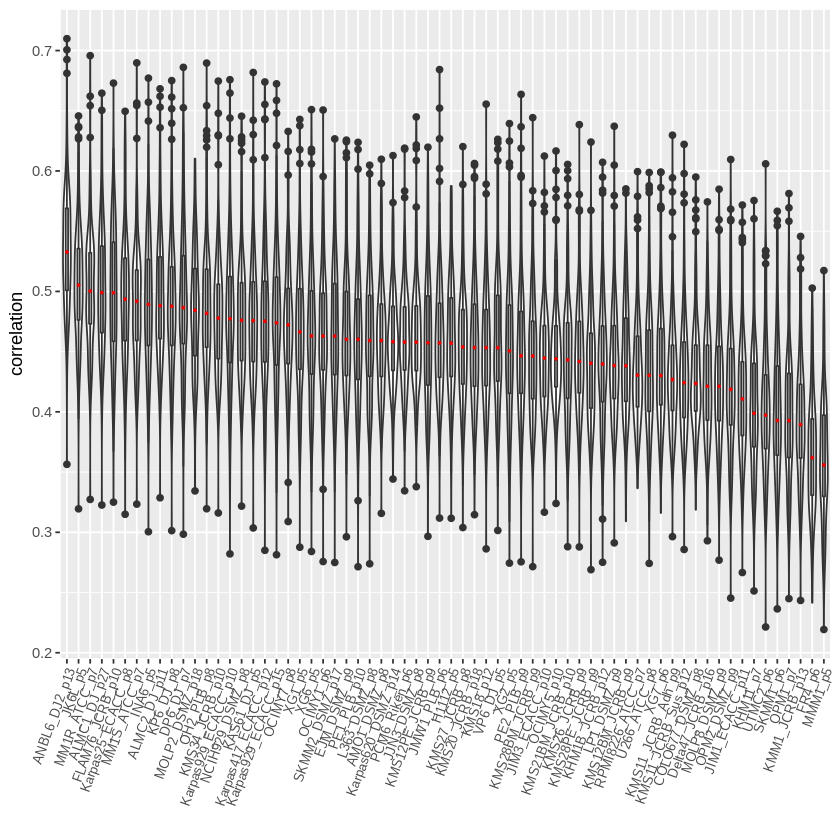

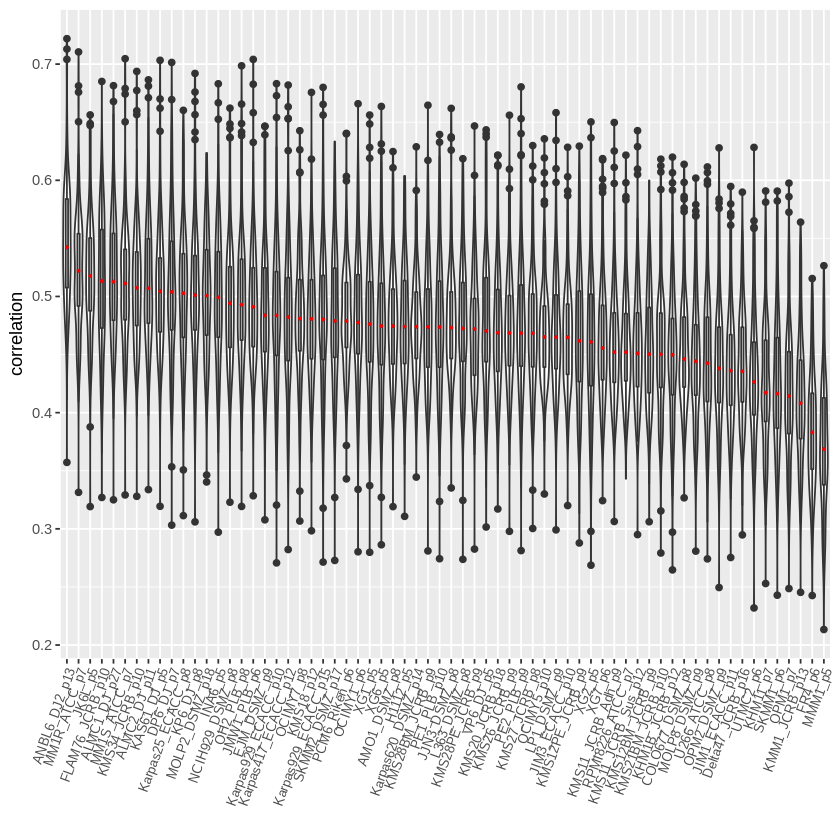

In [18]:
#### NRAS #####

NRAS_mut = filter(MM_pat_mut, GENE == "NRAS") %>%
  select(sample, EFFECT, HGVS_P, FEATURE) %>%
  filter(EFFECT == "missense_variant") %>%
  mutate(position = str_extract(HGVS_P, "[0-9]+")) %>%
  filter(position %in% c(12, 13, 61))

MM_pat_mut_NRAS = unique(NRAS_mut$sample)
length(MM_pat_mut_NRAS)
keep_NRAS = colnames(MM_patients) %in% MM_pat_mut_NRAS

MM_patients_NRAS = MM_patients[,keep_NRAS]
MM_combined_NRAS = cbind(MM_cell_line, MM_patients_NRAS)
MM_combined_NRAS.filtered = MM_combined_NRAS[keepi,]
MM_combined_NRAS.filtered = MM_combined_NRAS.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_NRAS.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_NRAS.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_NRAS)
tumor_cell_all = data.frame()

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )
####################################################################################################

norm_pat_NRAS = norm_pat[, keep_NRAS]
keepi_NRAS = apply(norm_pat_NRAS, 1, IQR)
keepis = sort(keepi_NRAS, decreasing = TRUE)
keepi_NRAS = keepi_NRAS %in% keepis[1:5000]

MM_patients_NRAS = MM_patients[,keep_NRAS]
MM_combined_NRAS = cbind(MM_cell_line, MM_patients_NRAS)
MM_combined_NRAS.filtered = MM_combined_NRAS[keepi_NRAS,]
MM_combined_NRAS.filtered = MM_combined_NRAS.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_NRAS.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_NRAS.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_NRAS)
tumor_cell_all = data.frame()

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

[1] 41

converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

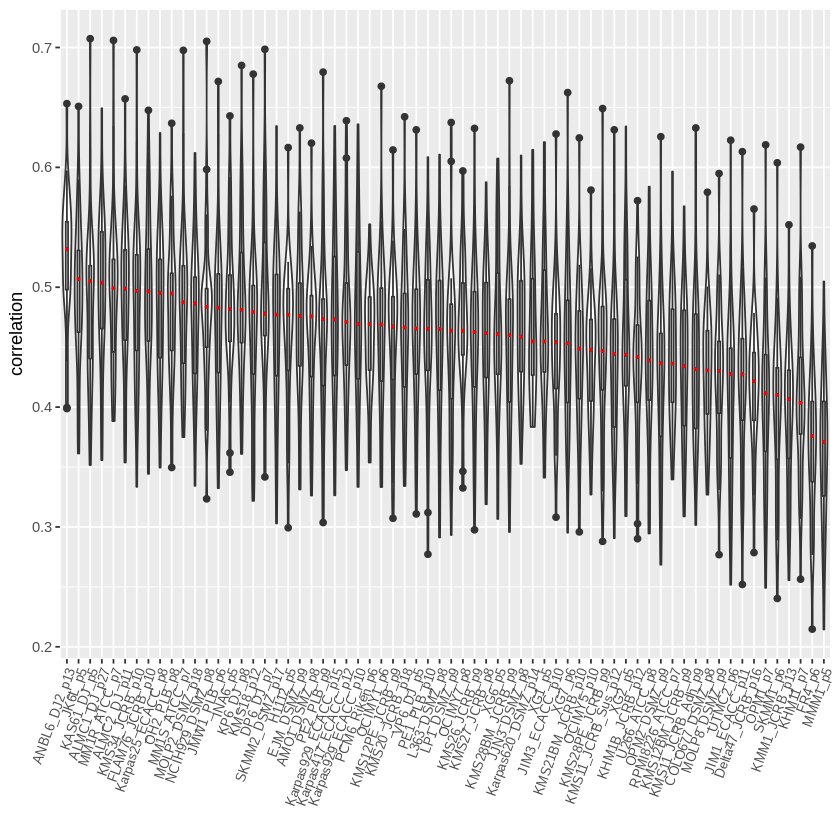

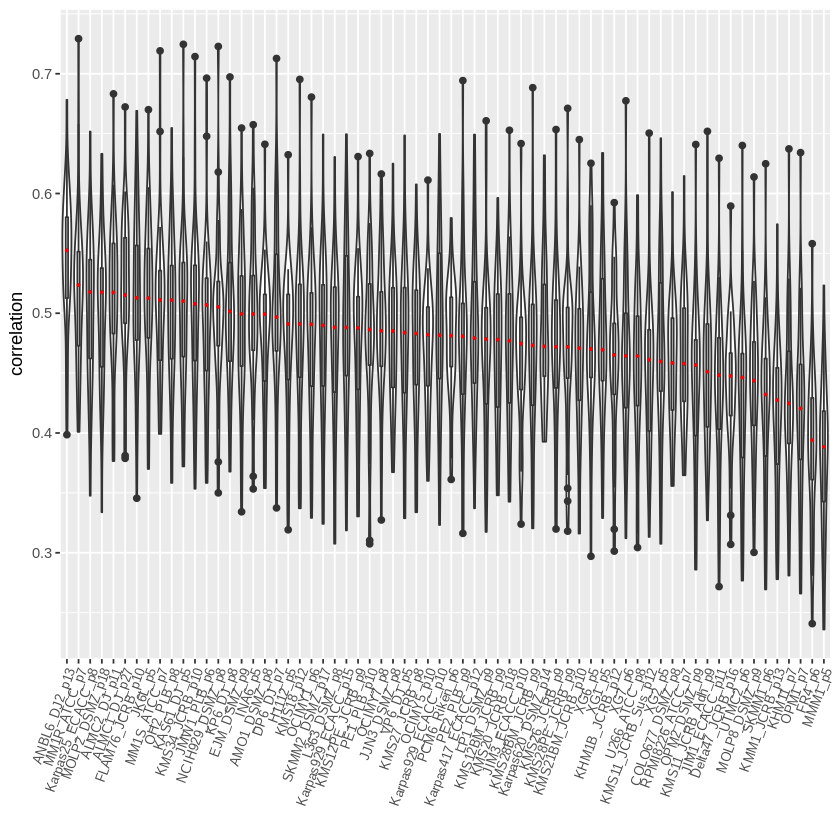

In [19]:
BRAF_mut = filter(MM_pat_mut, GENE == "BRAF") %>%
  select(sample, EFFECT, HGVS_P, FEATURE) %>%
  filter(EFFECT == "missense_variant") %>%
  mutate(position = str_extract(HGVS_P, "[0-9]+")) %>%
  filter(position %in% c(600))

MM_pat_mut_BRAF = unique(BRAF_mut$sample)
length(MM_pat_mut_BRAF)
keep_BRAF = colnames(MM_patients) %in% MM_pat_mut_BRAF

MM_patients_BRAF = MM_patients[,keep_BRAF]
MM_combined_BRAF = cbind(MM_cell_line, MM_patients_BRAF)
MM_combined_BRAF.filtered = MM_combined_BRAF[keepi,]
MM_combined_BRAF.filtered = MM_combined_BRAF.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_BRAF.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_BRAF.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_BRAF)
tumor_cell_all = data.frame()

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )
#################################################################################################
norm_pat_BRAF = norm_pat[, keep_BRAF]
keepi_BRAF = apply(norm_pat_BRAF, 1, IQR)
keepis = sort(keepi_BRAF, decreasing = TRUE)
keepi_BRAF = keepi_BRAF %in% keepis[1:5000]

MM_patients_BRAF = MM_patients[,keep_BRAF]
MM_combined_BRAF = cbind(MM_cell_line, MM_patients_BRAF)
MM_combined_BRAF.filtered = MM_combined_BRAF[keepi_BRAF,]
MM_combined_BRAF.filtered = MM_combined_BRAF.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_BRAF.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_BRAF.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_BRAF)
tumor_cell_all = data.frame()

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

[1] 92

converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

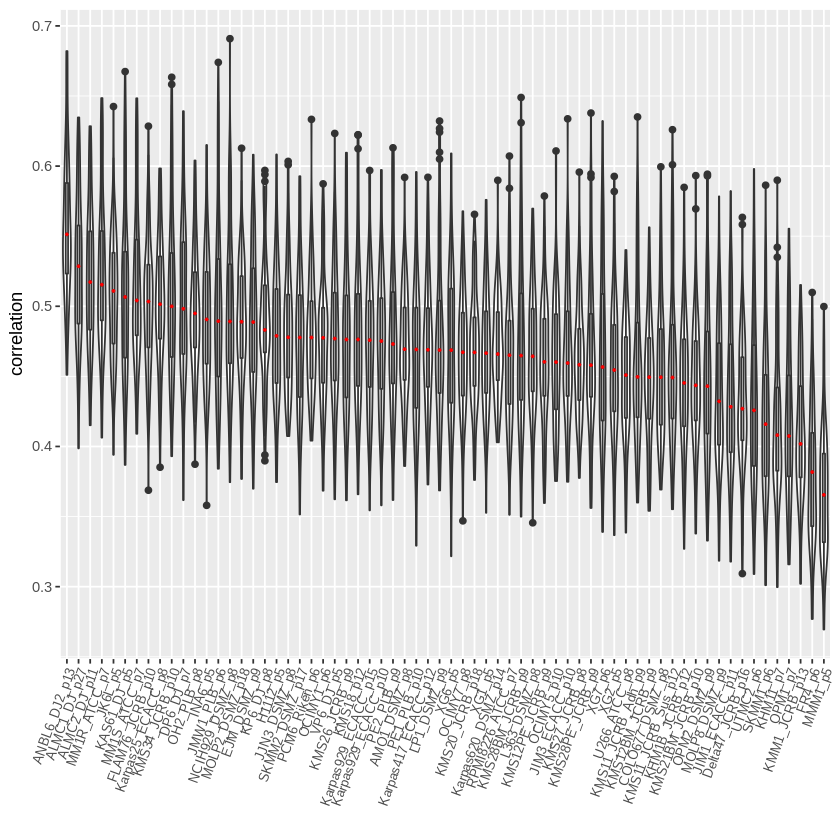

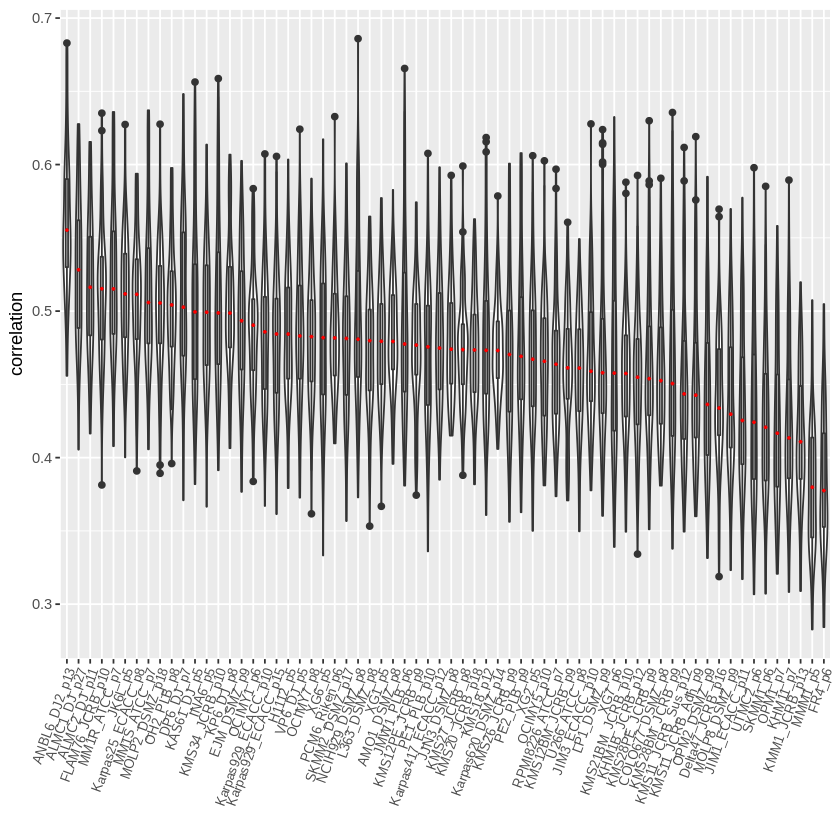

In [20]:
DIS3_mut = filter(MM_pat_mut, EFFECT %in% c("missense_variant",
                                         "frameshift_variant",
                                         "stop_gained",
                                         "start_lost",
                                         "stop_lost",
                                         "missense_variant&splice_region_variant",
                                         "frameshift_variant&splice_region_variant",
                                         "disruptive_inframe_deletion",
                                         "stop_gained&splice_region_variant",
                                         "frameshift_variant&stop_gained",
                                         "frameshift_variant&splice_acceptor_variant&splice_region_variant&intron_variant",
                                         "frameshift_variant&splice_donor_variant&splice_region_variant&intron_variant",
                                         "splice_donor_variant&disruptive_inframe_deletion&splice_region_variant&intron_variant",
                                         "stop_lost&splice_region_variant",
                                         "disruptive_inframe_insertion",
                                         "stop_gained&disruptive_inframe_deletion",
                                         "frameshift_variant&start_lost",
                                         "stop_gained&disruptive_inframe_insertion",
                                         "disruptive_inframe_deletion&splice_region_variant",
                                         "disruptive_inframe_insertion&splice_region_variant",
                                         "start_lost&splice_region_variant",
                                         "start_lost&inframe_deletion",
                                         "frameshift_variant&stop_lost",
                                         "splice_acceptor_variant&disruptive_inframe_deletion&splice_region_variant&intron_variant",
                                         "stop_lost&inframe_deletion")) %>%
  filter(str_extract(sample, "_[0-9]_") == "_1_")  %>%
  filter(GENE == 'DIS3')

MM_pat_mut_DIS3 = unique(DIS3_mut$sample)
length(MM_pat_mut_DIS3)
keep_DIS3 = colnames(MM_patients) %in% MM_pat_mut_DIS3

MM_patients_DIS3 = MM_patients[,keep_DIS3]
MM_combined_DIS3 = cbind(MM_cell_line, MM_patients_DIS3)
MM_combined_DIS3.filtered = MM_combined_DIS3[keepi,]
MM_combined_DIS3.filtered = MM_combined_DIS3.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_DIS3.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_DIS3.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_DIS3)
tumor_cell_all = data.frame()

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )
###################################################################################################

norm_pat_DIS3 = norm_pat[, keep_DIS3]
keepi_DIS3 = apply(norm_pat_DIS3, 1, IQR)
keepis = sort(keepi_DIS3, decreasing = TRUE)
keepi_DIS3 = keepi_DIS3 %in% keepis[1:5000]

MM_patients_DIS3 = MM_patients[,keep_DIS3]
MM_combined_DIS3 = cbind(MM_cell_line, MM_patients_DIS3)
MM_combined_DIS3.filtered = MM_combined_DIS3[keepi_DIS3,]
MM_combined_DIS3.filtered = MM_combined_DIS3.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_DIS3.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_DIS3.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_DIS3)
tumor_cell_all = data.frame()

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

[1] 88

converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

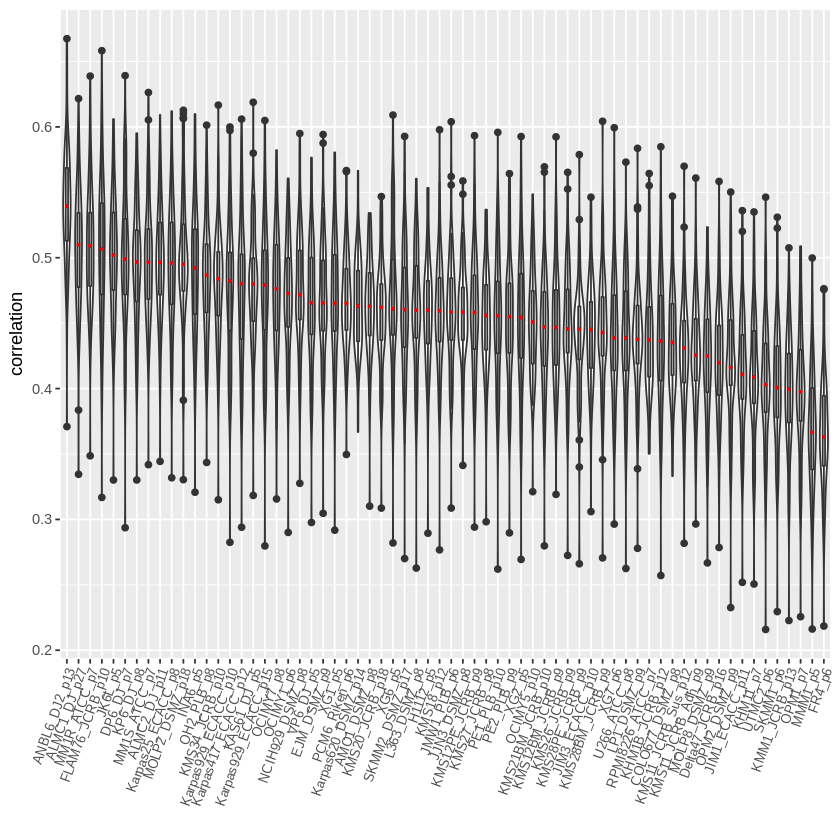

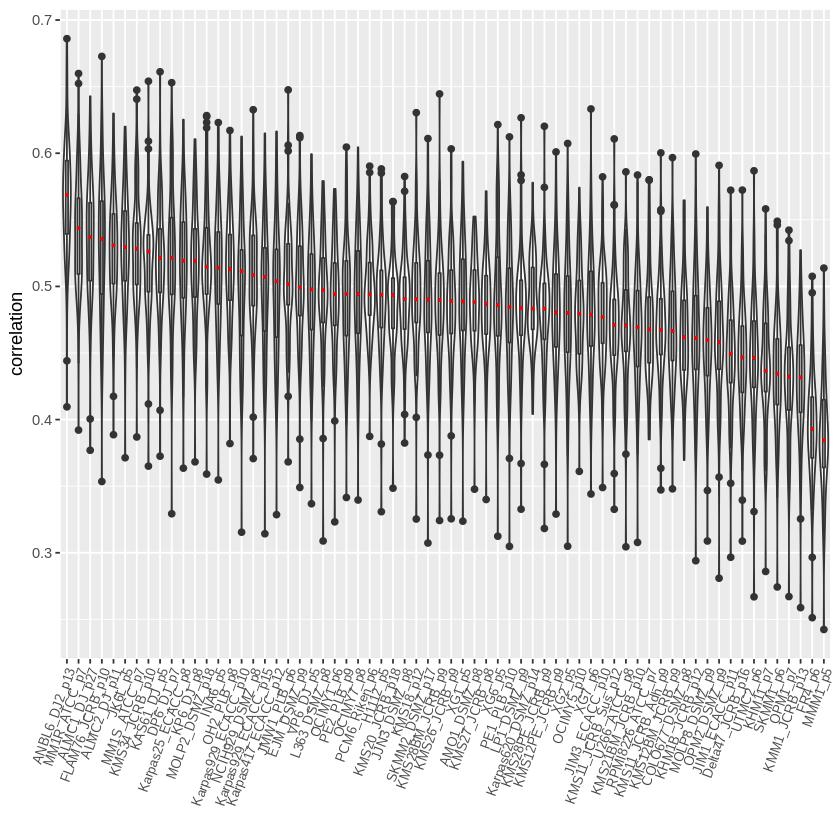

In [21]:
FAM46C_mut = filter(MM_pat_mut, EFFECT %in% c("missense_variant",
                                         "frameshift_variant",
                                         "stop_gained",
                                         "start_lost",
                                         "stop_lost",
                                         "missense_variant&splice_region_variant",
                                         "frameshift_variant&splice_region_variant",
                                         "disruptive_inframe_deletion",
                                         "stop_gained&splice_region_variant",
                                         "frameshift_variant&stop_gained",
                                         "frameshift_variant&splice_acceptor_variant&splice_region_variant&intron_variant",
                                         "frameshift_variant&splice_donor_variant&splice_region_variant&intron_variant",
                                         "splice_donor_variant&disruptive_inframe_deletion&splice_region_variant&intron_variant",
                                         "stop_lost&splice_region_variant",
                                         "disruptive_inframe_insertion",
                                         "stop_gained&disruptive_inframe_deletion",
                                         "frameshift_variant&start_lost",
                                         "stop_gained&disruptive_inframe_insertion",
                                         "disruptive_inframe_deletion&splice_region_variant",
                                         "disruptive_inframe_insertion&splice_region_variant",
                                         "start_lost&splice_region_variant",
                                         "start_lost&inframe_deletion",
                                         "frameshift_variant&stop_lost",
                                         "splice_acceptor_variant&disruptive_inframe_deletion&splice_region_variant&intron_variant",
                                         "stop_lost&inframe_deletion")) %>%
  filter(str_extract(sample, "_[0-9]_") == "_1_")  %>%
  filter(GENE == 'FAM46C')

MM_pat_mut_FAM46C = unique(FAM46C_mut$sample)
length(MM_pat_mut_FAM46C)
keep_FAM46C = colnames(MM_patients) %in% MM_pat_mut_FAM46C

MM_patients_FAM46C = MM_patients[,keep_FAM46C]
MM_combined_FAM46C = cbind(MM_cell_line, MM_patients_FAM46C)
MM_combined_FAM46C.filtered = MM_combined_FAM46C[keepi,]
MM_combined_FAM46C.filtered = MM_combined_FAM46C.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_FAM46C.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_FAM46C.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_FAM46C)
tumor_cell_all = data.frame()

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )
################################################################################################################

norm_pat_FAM46C = norm_pat[, keep_FAM46C]
keepi_FAM46C = apply(norm_pat_FAM46C, 1, IQR)
keepis = sort(keepi_FAM46C, decreasing = TRUE)
keepi_FAM46C = keepi_FAM46C %in% keepis[1:5000]

MM_patients_FAM46C = MM_patients[,keep_FAM46C]
MM_combined_FAM46C = cbind(MM_cell_line, MM_patients_FAM46C)
MM_combined_FAM46C.filtered = MM_combined_FAM46C[keepi_FAM46C,]
MM_combined_FAM46C.filtered = MM_combined_FAM46C.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_FAM46C.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn

setv = vst(as.matrix(round(MM_combined_FAM46C.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_FAM46C)
tumor_cell_all = data.frame()

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )


In [22]:
colnames(MM_patients_KRAS)

[1] "MMRF_1910_1_BM" "MMRF_1466_1_BM" "MMRF_2400_1_BM" "MMRF_2119_1_BM"
  [5] "MMRF_2828_1_BM" "MMRF_1261_1_BM" "MMRF_1830_1_BM" "MMRF_1587_1_BM"
  [9] "MMRF_2173_1_BM" "MMRF_1786_1_BM" "MMRF_1284_1_BM" "MMRF_1972_1_BM"
 [13] "MMRF_1152_1_BM" "MMRF_2639_1_BM" "MMRF_2691_1_BM" "MMRF_1886_1_BM"
 [17] "MMRF_2814_1_BM" "MMRF_1792_1_BM" "MMRF_1644_1_BM" "MMRF_1573_1_BM"
 [21] "MMRF_2631_1_BM" "MMRF_2362_1_BM" "MMRF_2419_1_BM" "MMRF_2093_1_BM"
 [25] "MMRF_1965_1_PB" "MMRF_1775_1_BM" "MMRF_2478_1_BM" "MMRF_1277_1_BM"
 [29] "MMRF_2778_1_BM" "MMRF_1579_1_BM" "MMRF_2035_1_BM" "MMRF_2696_1_BM"
 [33] "MMRF_1267_1_BM" "MMRF_2081_1_BM" "MMRF_1252_1_BM" "MMRF_1965_1_BM"
 [37] "MMRF_1356_1_BM" "MMRF_1540_1_BM" "MMRF_1588_1_BM" "MMRF_1089_1_BM"
 [41] "MMRF_2746_1_BM" "MMRF_2480_1_BM" "MMRF_2313_1_BM" "MMRF_2469_1_BM"
 [45] "MMRF_2763_1_BM" "MMRF_2779_1_BM" "MMRF_2729_1_BM" "MMRF_1365_1_BM"
 [49] "MMRF_2505_1_BM" "MMRF_2762_1_BM" "MMRF_1320_1_BM" "MMRF_2535_1_BM"
 [53] "MMRF_1038_1_BM" "MMRF_2788_1_BM" "MMRF_1690_1_BM" "MMRF_1485_1_BM"
 [57] "MMRF_2599_1_BM" "MMRF_1078_1_BM" "MMRF_2489_1_BM" "MMRF_1312_1_BM"
 [61] "MMRF_1790_1_BM" "MMRF_2240_1_BM" "MMRF_2062_1_BM" "MMRF_2613_1_BM"
 [65] "MMRF_1722_1_BM" "MMRF_1668_1_BM" "MMRF_1997_1_BM" "MMRF_2526_1_BM"
 [69] "MMRF_1496_1_BM" "MMRF_2016_1_BM" "MMRF_2622_1_BM" "MMRF_2476_1_BM"
 [73] "MMRF_1714_1_BM" "MMRF_1655_1_PB" "MMRF_1318_1_BM" "MMRF_1129_1_BM"
 [77] "MMRF_2677_1_BM" "MMRF_2378_1_BM" "MMRF_1952_1_BM" "MMRF_1574_1_BM"
 [81] "MMRF_1625_1_BM" "MMRF_1531_1_BM" "MMRF_1593_1_BM" "MMRF_1603_1_BM"
 [85] "MMRF_1512_1_BM" "MMRF_1654_1_BM" "MMRF_2300_1_BM" "MMRF_2149_1_BM"
 [89] "MMRF_1462_1_BM" "MMRF_2141_1_BM" "MMRF_2258_1_BM" "MMRF_2772_1_BM"
 [93] "MMRF_2106_1_BM" "MMRF_2457_1_BM" "MMRF_2475_1_BM" "MMRF_1726_1_BM"
 [97] "MMRF_1900_1_BM" "MMRF_2214_1_BM" "MMRF_2808_1_BM" "MMRF_1614_1_BM"
[101] "MMRF_1188_1_BM" "MMRF_1281_1_BM" "MMRF_1506_1_BM" "MMRF_1842_1_BM"
[105] "MMRF_2734_1_BM" "MMRF_2727_1_BM" "MMRF_2519_1_BM" "MMRF_1857_1_BM"
[109] "MMRF_1393_1_BM" "MMRF_1860_1_BM" "MMRF_2641_1_BM" "MMRF_2820_1_BM"
[113] "MMRF_2054_1_BM" "MMRF_1856_1_BM" "MMRF_1425_1_BM" "MMRF_2745_1_BM"
[117] "MMRF_2667_1_BM" "MMRF_1982_1_BM" "MMRF_1671_1_BM" "MMRF_1823_1_BM"
[121] "MMRF_1565_1_BM" "MMRF_2097_1_BM" "MMRF_2365_1_BM" "MMRF_1682_1_BM"
[125] "MMRF_1634_1_BM" "MMRF_2485_1_BM" "MMRF_2769_1_BM" "MMRF_1502_1_BM"
[129] "MMRF_1978_1_BM" "MMRF_1231_1_BM" "MMRF_1434_1_BM" "MMRF_1030_1_BM"
[133] "MMRF_2366_1_BM" "MMRF_2523_1_BM" "MMRF_2116_1_BM" "MMRF_1021_1_BM"
[137] "MMRF_2531_1_PB" "MMRF_2532_1_BM" "MMRF_2531_1_BM" "MMRF_1257_1_BM"
[141] "MMRF_2339_1_BM" "MMRF_2083_1_BM" "MMRF_1310_1_BM" "MMRF_2654_1_BM"
[145] "MMRF_2201_1_BM" "MMRF_2266_1_BM" "MMRF_1426_1_BM" "MMRF_1082_1_BM"
[149] "MMRF_2330_1_BM" "MMRF_1359_1_BM" "MMRF_2047_1_BM" "MMRF_1932_1_BM"
[153] "MMRF_2195_1_BM" "MMRF_1773_1_BM" "MMRF_1032_1_BM" "MMRF_1876_1_BM"
[157] "MMRF_2499_1_BM" "MMRF_2335_1_BM" "MMRF_1496_1_PB" "MMRF_2379_1_BM"
[161] "MMRF_2440_1_BM"

In [23]:
x = c()

pat_names = colnames(norm_pat)

for(pat in pat_names){
    if (pat %in% colnames(MM_patients_1114)){
        x = append(x, 't(11;14)')
    }
    else if (pat %in% colnames(MM_patients_1416)){
        x = append(x, 't(14;16)')
    }
    else if (pat %in% colnames(MM_patients_414)){
        x = append(x, 't(4;14)')
    }
    else{
        x = append(x, 'none')
    }
    #x = append(x, pat)
}

#head(pat_names)

head(x)
# x = append(x, 5)
# x = append(x, 6)
tail(x)
# head(norm_pat)
typeof(x)

[1] "t(11;14)" "t(11;14)" "t(4;14)"  "none"     "none"     "none"

[1] "none" "none" "none" "none" "none" "none"

[1] "character"

In [24]:
norm_pat_hm = norm_pat[keepi,] 
x = as.data.frame(x)

length(colnames(norm_pat_hm))
rownames(x) = colnames(norm_pat)
head(norm_pat_hm)
head(x)


[1] 779

MMRF_2801_1_BM MMRF_2718_1_BM MMRF_2815_1_BM MMRF_1656_1_BM
ENSG00000000003  5.706701       9.448304       7.324238       5.271563     
ENSG00000000460  7.159834       7.953131       6.303012       7.886763     
ENSG00000000938  8.746701       6.703480       7.717733       7.932934     
ENSG00000000971  8.862271       9.571402       9.190858       7.564574     
ENSG00000001561  6.661737       8.971313      11.025713      10.156694     
ENSG00000002586 11.994914      11.378822       9.426918       6.032518     
                MMRF_2461_1_BM MMRF_2057_1_BM MMRF_1910_1_BM MMRF_2341_1_BM
ENSG00000000003  9.739642       5.509058       5.450137       5.824661     
ENSG00000000460  6.930487       8.015715       8.175981       8.292235     
ENSG00000000938 11.065762       5.509058       8.410919       8.484409     
ENSG00000000971  8.365990       5.688864       7.920807       5.683272     
ENSG00000001561 11.332658      11.125788      10.426147      10.135635     
ENSG00000002586  9.011159       5.843147      10.787253      11.052313     
                MMRF_2501_1_BM MMRF_1383_1_BM ⋯ MMRF_1731_1_BM MMRF_2799_1_BM
ENSG00000000003  8.927920      10.018315      ⋯  4.616482       6.670259     
ENSG00000000460  7.654168       7.574603      ⋯  7.315049       6.690237     
ENSG00000000938  5.911497       5.970704      ⋯ 11.841441       6.608474     
ENSG00000000971  6.319269       5.727682      ⋯ 11.588447       6.130490     
ENSG00000001561 10.971526      10.884766      ⋯  9.221795       9.191258     
ENSG00000002586  6.417018       6.262249      ⋯ 10.608299      10.806764     
                MMRF_2379_1_BM MMRF_1474_1_BM MMRF_1641_1_BM MMRF_2795_1_BM
ENSG00000000003  4.696794      7.805892       7.202628       8.190469      
ENSG00000000460  8.101744      7.132366       7.327568       6.058825      
ENSG00000000938  6.215489      5.460939       8.525669       7.242733      
ENSG00000000971  5.353917      4.990163       5.979134       6.557319      
ENSG00000001561 12.131861      9.725781       7.531213       8.748366      
ENSG00000002586  5.993067      6.359451       6.926378       8.492375      
                MMRF_2316_1_BM MMRF_2440_1_BM MMRF_2731_1_BM MMRF_1355_1_BM
ENSG00000000003  5.737004       4.876822       5.526733       5.492849     
ENSG00000000460  6.926945       7.674696       7.720304       7.431559     
ENSG00000000938  7.075443       5.420058       7.560545       6.471512     
ENSG00000000971  5.776347      10.992843       6.373664       5.823284     
ENSG00000001561 10.449876      10.692210      10.298374      10.827540     
ENSG00000002586 14.140201       5.957463       6.183089       8.264722

x       
MMRF_2801_1_BM t(11;14)
MMRF_2718_1_BM t(11;14)
MMRF_2815_1_BM t(4;14) 
MMRF_1656_1_BM none    
MMRF_2461_1_BM none    
MMRF_2057_1_BM none

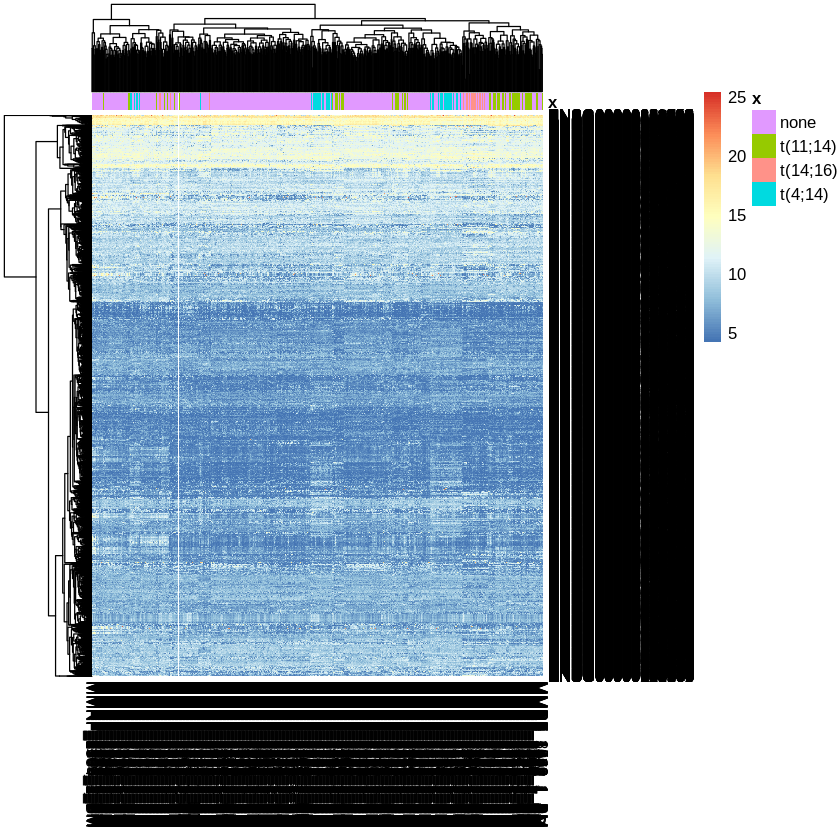

In [25]:
pheatmap(norm_pat_hm, annotation_col = x)

In [26]:
rm = rowMeans(norm_pat_hm)
head(rm)
head(norm_pat_hm - rm)

ENSG00000000003 ENSG00000000460 ENSG00000000938 ENSG00000000971 ENSG00000001561 
       6.931565        7.752433        7.326198        6.907464       10.162815 
ENSG00000002586 
       8.444872

MMRF_2801_1_BM MMRF_2718_1_BM MMRF_2815_1_BM MMRF_1656_1_BM
ENSG00000000003 -1.2248634      2.5167394      0.3926736     -1.660002127  
ENSG00000000460 -0.5925998      0.2006974     -1.4494217      0.134329028  
ENSG00000000938  1.4205029     -0.6227178      0.3915351      0.606735961  
ENSG00000000971  1.9548069      2.6639379      2.2833943      0.657110531  
ENSG00000001561 -3.5010776     -1.1915019      0.8628984     -0.006121075  
ENSG00000002586  3.5500417      2.9339497      0.9820456     -2.412353945  
                MMRF_2461_1_BM MMRF_2057_1_BM MMRF_1910_1_BM MMRF_2341_1_BM
ENSG00000000003  2.8080775     -1.4225069     -1.4814272     -1.10690402   
ENSG00000000460 -0.8219462      0.2632812      0.4235471      0.53980183   
ENSG00000000938  3.7395644     -1.8171402      1.0847208      1.15821149   
ENSG00000000971  1.4585265     -1.2186000      1.0133438     -1.22419195   
ENSG00000001561  1.1698426      0.9629729      0.2633319     -0.02717989   
ENSG00000002586  0.5662874     -2.6017252      2.3423812      2.60744074   
                MMRF_2501_1_BM MMRF_1383_1_BM ⋯ MMRF_1731_1_BM MMRF_2799_1_BM
ENSG00000000003  1.99635498     3.0867502     ⋯ -2.3150822     -0.2613059    
ENSG00000000460 -0.09826556    -0.1778307     ⋯ -0.4373846     -1.0621960    
ENSG00000000938 -1.41470100    -1.3554944     ⋯  4.5152431     -0.7177242    
ENSG00000000971 -0.58819512    -1.1797821     ⋯  4.6809832     -0.7769737    
ENSG00000001561  0.80871114     0.7219513     ⋯ -0.9410200     -0.9715573    
ENSG00000002586 -2.02785403    -2.1826230     ⋯  2.1634268      2.3618916    
                MMRF_2379_1_BM MMRF_1474_1_BM MMRF_1641_1_BM MMRF_2795_1_BM
ENSG00000000003 -2.2347706      0.8743276      0.2710630      1.25890396   
ENSG00000000460  0.3493103     -0.6200679     -0.4248653     -1.69360837   
ENSG00000000938 -1.1107086     -1.8652588      1.1994705     -0.08346517   
ENSG00000000971 -1.5535466     -1.9173010     -0.9283300     -0.35014432   
ENSG00000001561  1.9690457     -0.4370338     -2.6316016     -1.41444910   
ENSG00000002586 -2.4518052     -2.0854215     -1.5184945      0.04750258   
                MMRF_2316_1_BM MMRF_2440_1_BM MMRF_2731_1_BM MMRF_1355_1_BM
ENSG00000000003 -1.1945610     -2.0547425     -1.4048312     -1.4387157    
ENSG00000000460 -0.8254888     -0.0777372     -0.0321295     -0.3208742    
ENSG00000000938 -0.2507546     -1.9061402      0.2343473     -0.8546863    
ENSG00000000971 -1.1311164      4.0853791     -0.5337999     -1.0841800    
ENSG00000001561  0.2870611      0.5293946      0.1355587      0.6647252    
ENSG00000002586  5.6953285     -2.4874093     -2.2617825     -0.1801502

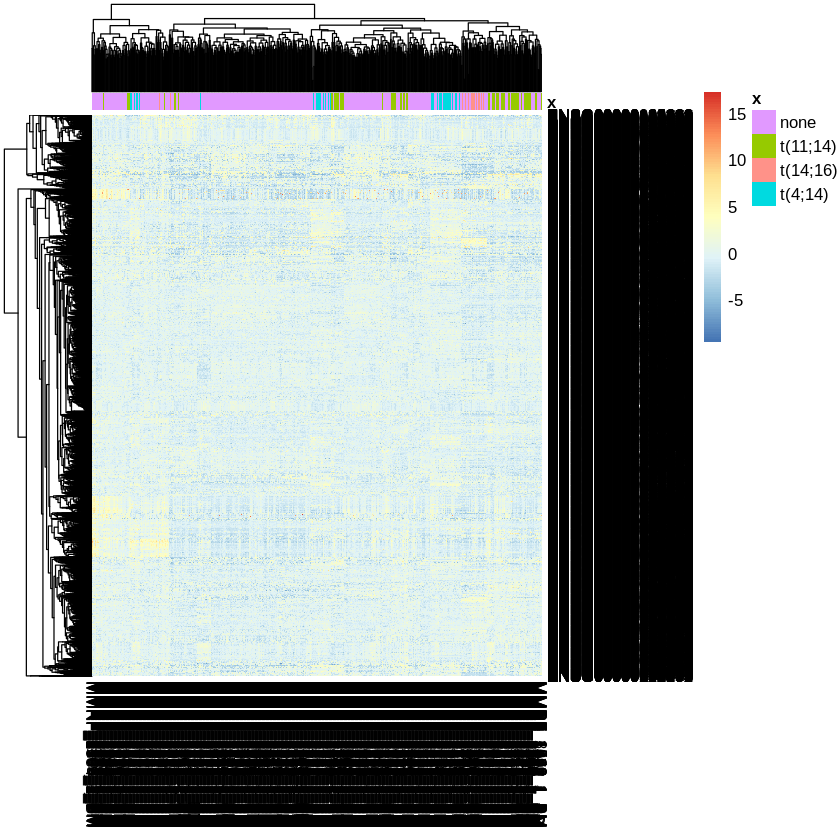

In [27]:
pheatmap((norm_pat_hm - rm), annotation_col = x)

In [28]:
cell_names = colnames(MM_cell_line)

In [29]:
cell_names[-1]

[1] "ALMC1_DJ_p27"        "ALMC2_DJ_p11"        "AMO1_DSMZ_p8"       
 [4] "ANBL6_DJ2_p13"       "COLO677_DSMZ_p8"     "Delta47_JCRB_p16"   
 [7] "DP6_DJ_p7"           "EJM_DSMZ_p9"         "FLAM76_JCRB_p10"    
[10] "FR4_p6"              "H1112_p5"            "INA6_p5"            
[13] "JIM1_ECACC_p11"      "JIM3_ECACC_p10"      "JJN3_DSMZ_p8"       
[16] "JK6L_p5"             "JMW1_PLB_p6"         "Karpas25_ECACC_p8"  
[19] "Karpas417_ECACC_p12" "Karpas620_DSMZ_p14"  "Karpas929_ECACC_p10"
[22] "Karpas929_ECACC_p15" "KAS61_DJ_p5"         "KHM11_p7"           
[25] "KHM1B_JCRB_p12"      "KMM1_JCRB_p13"       "KMS11_JCRB_Adh_p9"  
[28] "KMS11_JCRB_Sus_p12"  "KMS12BM_JCRB_p9"     "KMS12PE_JCRB_p9"    
[31] "KMS18_p12"           "KMS20_JCRB_p18"      "KMS21BM_JCRB_p10"   
[34] "KMS26_JCRB_p9"       "KMS27_JCRB_p8"       "KMS28BM_JCRB_p9"    
[37] "KMS28PE_JCRB_p9"     "KMS34_JCRB_p10"      "KP6_DJ_p8"          
[40] "L363_DSMZ_p8"        "LP1_DSMZ_p9"         "MM1R_ATCC_p7"       
[43] "MM1S_ATCC_p7"        "MMM1_p5"             "MOLP2_DSMZ_p18"     
[46] "MOLP8_DSMZ_p9"       "NCIH929_DSMZ_p8"     "OCIMY1_p6"          
[49] "OCIMY5_p10"          "OCIMY7_p8"           "OH2_PLB_p8"         
[52] "OPM1_p7"             "OPM2_DSMZ_p9"        "PCM6_Riken_p6"      
[55] "PE1_PLB_p10"         "PE2_PLB_p9"          "RPMI8226_ATCC_p7"   
[58] "SKMM1_p6"            "SKMM2_DSMZ_p17"      "U266_ATCC_p8"       
[61] "UTMC2_p6"            "VP6_DJ_p5"           "XG1_p5"             
[64] "XG2_p5"              "XG6_p5"              "XG7_p6"

In [30]:
length(cell_names)

[1] 67

converting counts to integer mode


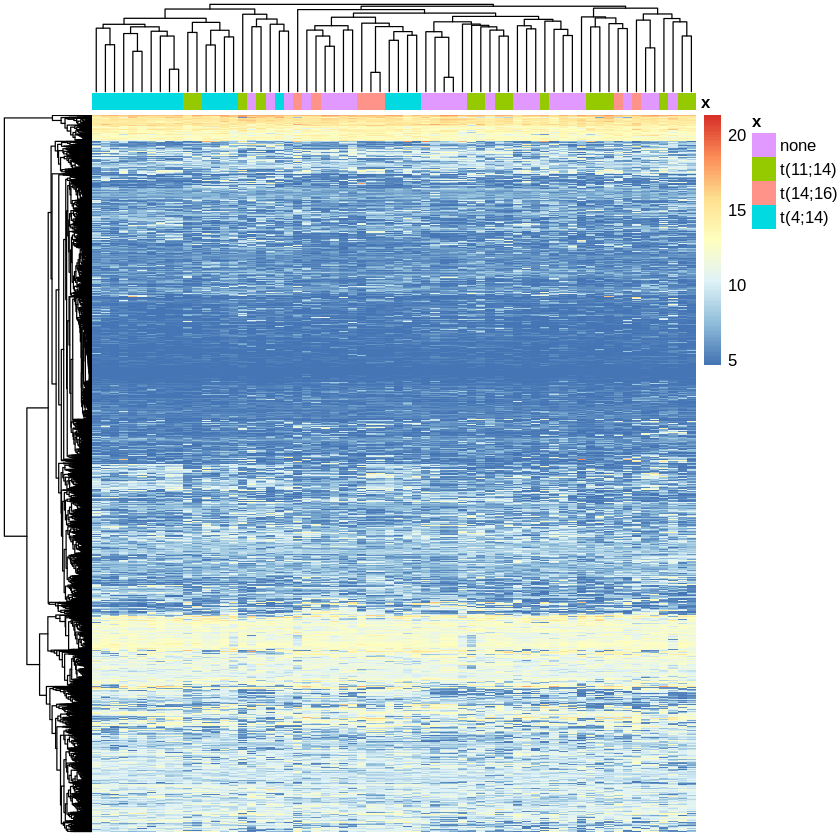

In [31]:
x = c('none', 'none', 'none', 't(14;16)', 'none', 'none', 'none', 'none', 
      't(11;14)', 'none', 't(11;14)', 't(11;14)', 't(4;14)', 't(4;14)', 't(14;16)', 'none',
     't(4;14)', 'none', 'none', 't(11;14)', 'none', 'none', 't(4;14)', 't(4;14)', 'none', 'none',
     't(4;14)', 't(4;14)', 't(11;14)', 't(11;14)', 't(4;14)', 'none', 't(11;14)', 't(4;14)', 't(11;14)',
     't(4;14)', 't(4;14)', 't(4;14)', 'none', 'none', 't(4;14)', 't(14;16)', 't(14;16)', 't(11;14)', 'none', 
      't(11;14)', 't(4;14)', 'none', 't(14;16)', 't(11;14)', 'none', 't(4;14)', 't(4;14)', 't(14;16)',
     't(11;14)', 't(4;14)', 'none', 'none', 't(11;14)', 't(11;14)', 't(4;14)', 't(14;16)', 't(11;14)', 'none', 
     'none', 't(4;14)')
norm_cells = vst(as.matrix(round(MM_cell_line[-1])))
norm_cells_hm = norm_cells[keepi,]
x = as.data.frame(x)
rownames(x) = colnames(MM_cell_line[-1])

pheatmap(norm_cells_hm, annotation_col = x, show_rownames = FALSE, show_colnames = FALSE)

#pheatmap(norm_cells_hm, )

converting counts to integer mode


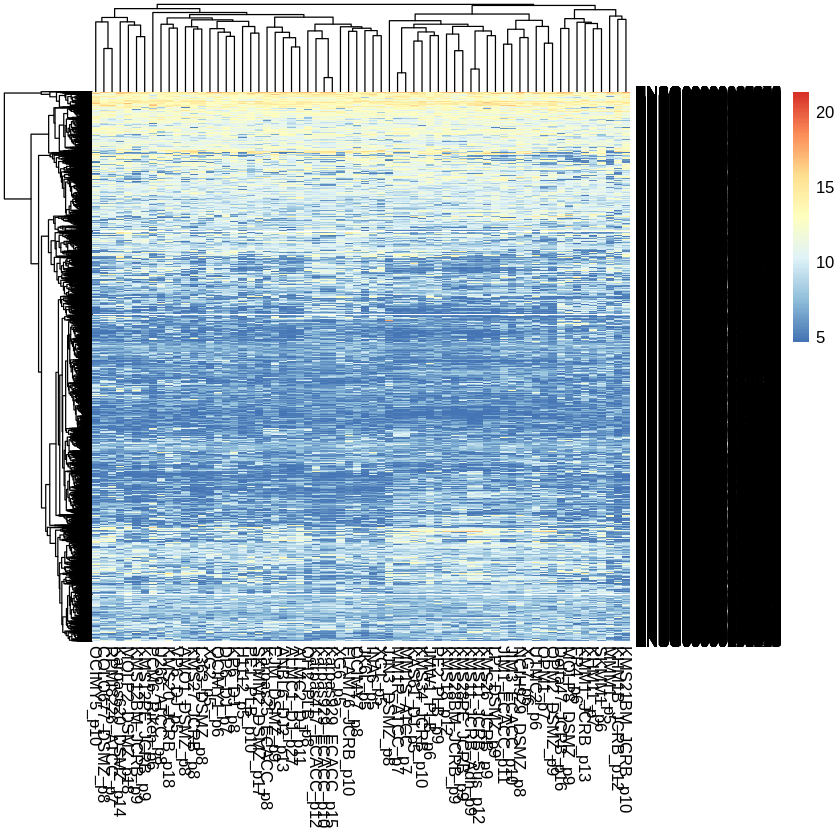

In [32]:
norm_cells = vst(as.matrix(round(MM_cell_line[-1])))

keepi_cells = apply(norm_cells, 1, IQR)
keepis = sort(keepi_cells, decreasing = TRUE)
keepi_cells = keepi_cells %in% keepis[1:5000]

norm_cells_hm = norm_cells[keepi_cells,]
pheatmap(norm_cells_hm)

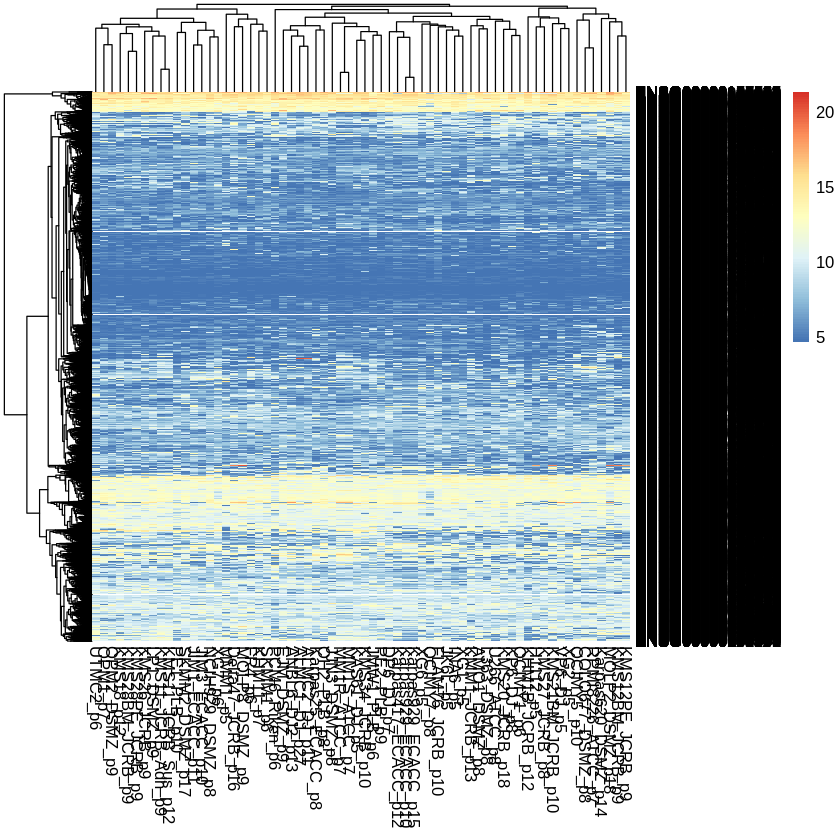

In [33]:
norm_cells_hm = norm_cells[keepi,]
pheatmap(norm_cells_hm)

In [34]:
MM_cell_mut = data.frame(fread("HMCL69_Predicted_Mutations_Samtools (1).csv"))
head(MM_cell_mut)
unique(MM_cell_mut$SNPEFF_FUNCTIONAL_CLASS)
unique(MM_cell_mut$SNPEFF_EFFECT)

Sample       X.CHROM POS      ID REF    ALT     QUAL GEN....GT    DP
1 ALMC1_DJ_p27 1        3342638    A      T       161  Heterozygous 40
2 ALMC1_DJ_p27 1       18703472    G      A       198  Heterozygous 80
3 ALMC1_DJ_p27 1       19205806    G      C        87  Heterozygous 22
4 ALMC1_DJ_p27 1       28268829    TCCCCC TCCCCCC 103  Homozygous   15
5 ALMC1_DJ_p27 1       35334251    G      T        56  Heterozygous 22
6 ALMC1_DJ_p27 1       57207852    T      C       207  Homozygous   29
  DP4         ⋯ SNPEFF_GENE_NAME SNPEFF_EFFECT         SNPEFF_FUNCTIONAL_CLASS
1 19,5,6,6    ⋯ PRDM16           NON_SYNONYMOUS_CODING MISSENSE               
2 13,13,24,26 ⋯ IGSF21           NON_SYNONYMOUS_CODING MISSENSE               
3 8,4,6,3     ⋯ ALDH4A1          NON_SYNONYMOUS_CODING MISSENSE               
4 0,0,3,10    ⋯ SMPDL3B          FRAME_SHIFT           NONE                   
5 11,3,6,2    ⋯ DLGAP3           NON_SYNONYMOUS_CODING MISSENSE               
6 0,0,16,12   ⋯ C1orf168         NON_SYNONYMOUS_CODING MISSENSE               
  SNPEFF_AMINO_ACID_CHANGE SNPEFF_CODON_CHANGE SNPEFF_IMPACT
1 T1044S                   Acg/Tcg             MODERATE     
2 R427Q                    cGg/cAg             MODERATE     
3 R250G                    Cgc/Ggc             MODERATE     
4 null                     null                HIGH         
5 Q814K                    Cag/Aag             MODERATE     
6 N529S                    aAc/aGc             MODERATE     
  SNPEFF_TRANSCRIPT_ID LOFSNPEFF3                     NMDSNPEFF3
1 ENST00000441472      null                           null      
2 ENST00000251296      null                           null      
3 ENST00000538309      null                           null      
4 ENST00000373890      SMPDL3B|ENSG00000130768|8|0.25 null      
5 ENST00000235180      null                           null      
6 ENST00000343433      null                           null      
  SNPEFF3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
1 EXON(MODIFIER|||||PRDM16|processed_transcript|CODING|ENST00000378389|3),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Acg/Tcg|T1044S|1256|PRDM16|protein_coding|CODING|ENST00000442529|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Acg/Tcg|T1044S|1275|PRDM16|protein_coding|CODING|ENST00000441472|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Acg/Tcg|T1045S|1177|PRDM16|protein_coding|CODING|ENST00000514189|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Acg/Tcg|T1045S|1257|PRDM16|protein_coding|CODING|ENST00000378391|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Acg/Tcg|T1045S|1276|PRDM16|protein_coding|CODING|ENST00000270722|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Acg/Tcg|T1045S|1276|PRDM16|protein_coding|CODING|ENST00000378398|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Acg/Tcg|T1046S|1178|PRDM16|protein_coding|CODING|ENST00000511072|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Acg/Tcg|T853S|1084|PRDM16|protein_coding|CODING|ENST00000509860|),

[1] "MISSENSE" "NONE"     "NONSENSE"

[1] "NON_SYNONYMOUS_CODING"             "FRAME_SHIFT"                      
 [3] "SPLICE_SITE_ACCEPTOR"              "CODON_INSERTION"                  
 [5] "CODON_CHANGE_PLUS_CODON_INSERTION" "SPLICE_SITE_DONOR"                
 [7] "CODON_CHANGE_PLUS_CODON_DELETION"  "STOP_GAINED"                      
 [9] "START_LOST"                        "CODON_DELETION"                   
[11] "STOP_LOST"                         "NON_SYNONYMOUS_START"             
[13] "TRANSCRIPT"

In [35]:
KRAS_mut_cell = filter(MM_cell_mut, SNPEFF_GENE_NAME == "KRAS") %>%
  filter(SNPEFF_FUNCTIONAL_CLASS == "MISSENSE") %>%
  mutate(position = str_extract(SNPEFF_AMINO_ACID_CHANGE, "[0-9]+")) %>%
  filter(position %in% c(12, 13, 61))
#NRAS_mut = filter(variant, GENE == "NRAS") %>%
 # select(sample, EFFECT, HGVS_P, FEATURE) %>%
  #filter(EFFECT == "missense_variant") %>%
  #mutate(position = str_extract(HGVS_P, "[0-9]+")) %>%
  #filter(position %in% c(12, 13, 61))
head(KRAS_mut_cell)
unique(KRAS_mut_cell$Sample)

Sample             X.CHROM POS      ID          REF ALT QUAL GEN....GT    DP 
1 COLO677_DSMZ_p8    12      25398284 rs121913529 C   G   173  Heterozygous 143
2 JIM3_ECACC_p5      12      25398284 rs121913529 C   G    66  Heterozygous 150
3 JK6L_p5            12      25380276 rs121913240 T   A    94  Heterozygous  26
4 JMW1_PLB_p6        12      25398284 rs121913529 C   A   140  Heterozygous 124
5 Karpas620_DSMZ_p14 12      25398284 rs121913529 C   T   175  Heterozygous 108
6 KHM1B_JCRB_p12     12      25398285 rs121913530 C   A   106  Heterozygous 108
  DP4         ⋯ SNPEFF_EFFECT         SNPEFF_FUNCTIONAL_CLASS
1 36,18,59,27 ⋯ NON_SYNONYMOUS_CODING MISSENSE               
2 55,52,20,19 ⋯ NON_SYNONYMOUS_CODING MISSENSE               
3 3,11,2,10   ⋯ NON_SYNONYMOUS_CODING MISSENSE               
4 22,23,45,27 ⋯ NON_SYNONYMOUS_CODING MISSENSE               
5 20,11,49,25 ⋯ NON_SYNONYMOUS_CODING MISSENSE               
6 15,11,49,28 ⋯ NON_SYNONYMOUS_CODING MISSENSE               
  SNPEFF_AMINO_ACID_CHANGE SNPEFF_CODON_CHANGE SNPEFF_IMPACT
1 G12A                     gGt/gCt             MODERATE     
2 G12A                     gGt/gCt             MODERATE     
3 Q61L                     cAa/cTa             MODERATE     
4 G12V                     gGt/gTt             MODERATE     
5 G12D                     gGt/gAt             MODERATE     
6 G12C                     Ggt/Tgt             MODERATE     
  SNPEFF_TRANSCRIPT_ID LOFSNPEFF3 NMDSNPEFF3
1 ENST00000256078      null       null      
2 ENST00000256078      null       null      
3 ENST00000256078      null       null      
4 ENST00000256078      null       null      
5 ENST00000256078      null       null      
6 ENST00000256078      null       null      
  SNPEFF3                                                                                                                                                                                                                                                                                                                                                                                                              
1 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gCt|G12A|188|KRAS|protein_coding|CODING|ENST00000311936|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gCt|G12A|189|KRAS|protein_coding|CODING|ENST00000256078|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gCt|G12A|43|KRAS|protein_coding|CODING|ENST00000556131|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gCt|G12A|75|KRAS|protein_coding|CODING|ENST00000557334|)
2 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gCt|G12A|188|KRAS|protein_coding|CODING|ENST00000311936|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gCt|G12A|189|KRAS|protein_coding|CODING|ENST00000256078|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gCt|G12A|43|KRAS|protein_coding|CODING|ENST00000556131|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gCt|G12A|75|KRAS|protein_coding|CODING|ENST00000557334|)
3 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|cAa/cTa|Q61L|188|KRAS|protein_coding|CODING|ENST00000311936|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|cAa/cTa|Q61L|189|KRAS|protein_coding|CODING|ENST00000256078|)                                                                                                                                                                                                          
4 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gTt|G12V|188|KRAS|protein_coding|CODING|ENST00000311936|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gTt|G12V|189|KRAS|protein_coding|CODING|ENST00000256078|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gTt|G12V|43|KRAS|protein_coding|CODING|ENST00000556131|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gTt|G12V|75|KRAS|protein_coding|CODING|ENST00000557334|)
5 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gAt|G12D|188|KRAS|protein_coding|CODING|ENST00000311936|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gAt|G12D|189|KRAS|protein_coding|CODING|ENST00000256078|),NON_SYNONYMOUS_CODIN

[1] "COLO677_DSMZ_p8"    "JIM3_ECACC_p5"      "JK6L_p5"           
 [4] "JMW1_PLB_p6"        "Karpas620_DSMZ_p14" "KHM1B_JCRB_p12"    
 [7] "KMS20_JCRB_p18"     "KMS28BM_JCRB_p9"    "KMS28PE_JCRB_p9"   
[10] "KP6_DJ_p8"          "MM1R_ATCC_p5"       "MM1S_ATCC_p5"      
[13] "OCIMY1_p6"          "RPMI8226_ATCC_p5"   "XG2_p5"            
[16] "XG6_p5"             "XG7_p6"

In [40]:
KRAS_mut_cell = filter(MM_cell_mut, SNPEFF_GENE_NAME == "KRAS")# %>%
#   filter(SNPEFF_FUNCTIONAL_CLASS == "MISSENSE") %>%
#   mutate(position = str_extract(SNPEFF_AMINO_ACID_CHANGE, "[0-9]+")) %>%
#   filter(position %in% c(12, 13, 61))
# #NRAS_mut = filter(variant, GENE == "NRAS") %>%
#  # select(sample, EFFECT, HGVS_P, FEATURE) %>%
  #filter(EFFECT == "missense_variant") %>%
  #mutate(position = str_extract(HGVS_P, "[0-9]+")) %>%
  #filter(position %in% c(12, 13, 61))
head(KRAS_mut_cell)
unique(KRAS_mut_cell$Sample)

Sample          X.CHROM POS      ID          REF ALT QUAL GEN....GT    DP 
1 AMO1_DSMZ_p8    12      25378562 rs121913527 C   T   143  Heterozygous 181
2 COLO677_DSMZ_p8 12      25398284 rs121913529 C   G   173  Heterozygous 143
3 FR4_p6          12      25378562 rs121913527 C   T   123  Heterozygous 193
4 H1112_p5        12      25378561             G   A   225  Heterozygous  91
5 JIM3_ECACC_p5   12      25398284 rs121913529 C   G    66  Heterozygous 150
6 JK6L_p5         12      25380276 rs121913240 T   A    94  Heterozygous  26
  DP4         ⋯ SNPEFF_GENE_NAME SNPEFF_EFFECT         SNPEFF_FUNCTIONAL_CLASS
1 63,49,39,29 ⋯ KRAS             NON_SYNONYMOUS_CODING MISSENSE               
2 36,18,59,27 ⋯ KRAS             NON_SYNONYMOUS_CODING MISSENSE               
3 22,19,74,73 ⋯ KRAS             NON_SYNONYMOUS_CODING MISSENSE               
4 18,17,29,26 ⋯ KRAS             NON_SYNONYMOUS_CODING MISSENSE               
5 55,52,20,19 ⋯ KRAS             NON_SYNONYMOUS_CODING MISSENSE               
6 3,11,2,10   ⋯ KRAS             NON_SYNONYMOUS_CODING MISSENSE               
  SNPEFF_AMINO_ACID_CHANGE SNPEFF_CODON_CHANGE SNPEFF_IMPACT
1 A146T                    Gca/Aca             MODERATE     
2 G12A                     gGt/gCt             MODERATE     
3 A146T                    Gca/Aca             MODERATE     
4 A146V                    gCa/gTa             MODERATE     
5 G12A                     gGt/gCt             MODERATE     
6 Q61L                     cAa/cTa             MODERATE     
  SNPEFF_TRANSCRIPT_ID LOFSNPEFF3 NMDSNPEFF3
1 ENST00000256078      null       null      
2 ENST00000256078      null       null      
3 ENST00000256078      null       null      
4 ENST00000256078      null       null      
5 ENST00000256078      null       null      
6 ENST00000256078      null       null      
  SNPEFF3                                                                                                                                                                                                                                                                                                                                                                                                              
1 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Gca/Aca|A146T|188|KRAS|protein_coding|CODING|ENST00000311936|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Gca/Aca|A146T|189|KRAS|protein_coding|CODING|ENST00000256078|)                                                                                                                                                                                                        
2 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gCt|G12A|188|KRAS|protein_coding|CODING|ENST00000311936|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gCt|G12A|189|KRAS|protein_coding|CODING|ENST00000256078|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gCt|G12A|43|KRAS|protein_coding|CODING|ENST00000556131|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gCt|G12A|75|KRAS|protein_coding|CODING|ENST00000557334|)
3 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Gca/Aca|A146T|188|KRAS|protein_coding|CODING|ENST00000311936|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Gca/Aca|A146T|189|KRAS|protein_coding|CODING|ENST00000256078|)                                                                                                                                                                                                        
4 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gCa/gTa|A146V|188|KRAS|protein_coding|CODING|ENST00000311936|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gCa/gTa|A146V|189|KRAS|protein_coding|CODING|ENST00000256078|)                                                                                                                                                                                                        
5 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gCt|G12A|188|KRAS|protein_coding|CODING|ENST00000311936|),NON_SYNONYMOUS_CODING(MO

[1] "AMO1_DSMZ_p8"       "COLO677_DSMZ_p8"    "FR4_p6"            
 [4] "H1112_p5"           "JIM3_ECACC_p5"      "JK6L_p5"           
 [7] "JMW1_PLB_p6"        "Karpas620_DSMZ_p14" "KHM1B_JCRB_p12"    
[10] "KMS20_JCRB_p18"     "KMS28BM_JCRB_p9"    "KMS28PE_JCRB_p9"   
[13] "KP6_DJ_p8"          "MM1R_ATCC_p5"       "MM1S_ATCC_p5"      
[16] "MOLP8_DSMZ_p9"      "OCIMY1_p6"          "RPMI8226_ATCC_p5"  
[19] "XG2_p5"             "XG6_p5"             "XG7_p6"

In [36]:
NRAS_mut_cell = filter(MM_cell_mut, SNPEFF_GENE_NAME == "NRAS") %>%
  filter(SNPEFF_FUNCTIONAL_CLASS == "MISSENSE") %>%
  mutate(position = str_extract(SNPEFF_AMINO_ACID_CHANGE, "[0-9]+")) %>%
  filter(position %in% c(12, 13, 61))
#NRAS_mut = filter(variant, GENE == "NRAS") %>%
 # select(sample, EFFECT, HGVS_P, FEATURE) %>%
  #filter(EFFECT == "missense_variant") %>%
  #mutate(position = str_extract(HGVS_P, "[0-9]+")) %>%
  #filter(position %in% c(12, 13, 61))
head(NRAS_mut_cell)
unique(NRAS_mut_cell$Sample)

Sample              X.CHROM POS       ID          REF ALT QUAL GEN....GT   
1 Karpas417_ECACC_p8  1       115256530 rs121913254 G   T   142  Heterozygous
2 Karpas929_ECACC_p15 1       115258744 rs121434596 C   T   191  Heterozygous
3 KHM11_p7            1       115256530 rs121913254 G   T   154  Heterozygous
4 KMM1_JCRB_p13       1       115258744 rs121434596 C   T   222  Homozygous  
5 KMS21BM_JCRB_p10    1       115256529 rs11554290  T   A   177  Heterozygous
6 KMS27_JCRB_p8       1       115256529 rs11554290  T   C   225  Heterozygous
  DP  DP4         ⋯ SNPEFF_EFFECT         SNPEFF_FUNCTIONAL_CLASS
1 149 27,59,18,42 ⋯ NON_SYNONYMOUS_CODING MISSENSE               
2  82 24,14,23,15 ⋯ NON_SYNONYMOUS_CODING MISSENSE               
3 116 18,23,23,46 ⋯ NON_SYNONYMOUS_CODING MISSENSE               
4  84 0,1,42,35   ⋯ NON_SYNONYMOUS_CODING MISSENSE               
5 134 15,35,19,60 ⋯ NON_SYNONYMOUS_CODING MISSENSE               
6 111 8,38,20,41  ⋯ NON_SYNONYMOUS_CODING MISSENSE               
  SNPEFF_AMINO_ACID_CHANGE SNPEFF_CODON_CHANGE SNPEFF_IMPACT
1 Q61K                     Caa/Aaa             MODERATE     
2 G13D                     gGt/gAt             MODERATE     
3 Q61K                     Caa/Aaa             MODERATE     
4 G13D                     gGt/gAt             MODERATE     
5 Q61L                     cAa/cTa             MODERATE     
6 Q61R                     cAa/cGa             MODERATE     
  SNPEFF_TRANSCRIPT_ID LOFSNPEFF3 NMDSNPEFF3
1 ENST00000369535      null       null      
2 ENST00000369535      null       null      
3 ENST00000369535      null       null      
4 ENST00000369535      null       null      
5 ENST00000369535      null       null      
6 ENST00000369535      null       null      
  SNPEFF3                                                                                              
1 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Caa/Aaa|Q61K|189|NRAS|protein_coding|CODING|ENST00000369535|)
2 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gAt|G13D|189|NRAS|protein_coding|CODING|ENST00000369535|)
3 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Caa/Aaa|Q61K|189|NRAS|protein_coding|CODING|ENST00000369535|)
4 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gAt|G13D|189|NRAS|protein_coding|CODING|ENST00000369535|)
5 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|cAa/cTa|Q61L|189|NRAS|protein_coding|CODING|ENST00000369535|)
6 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|cAa/cGa|Q61R|189|NRAS|protein_coding|CODING|ENST00000369535|)
  position
1 61      
2 13      
3 61      
4 13      
5 61      
6 61

[1] "Karpas417_ECACC_p8"  "Karpas929_ECACC_p15" "KHM11_p7"           
 [4] "KMM1_JCRB_p13"       "KMS21BM_JCRB_p10"    "KMS27_JCRB_p8"      
 [7] "L363_DSMZ_p8"        "MOLP8_DSMZ_p9"       "NCIH929_DSMZ_p8"    
[10] "OCIMY7_p8"           "OH2_PLB_p8"          "PE2_PLB_p9"         
[13] "XG1_p5"

In [42]:
NRAS_mut_cell = filter(MM_cell_mut, SNPEFF_GENE_NAME == "NRAS")# %>%
#   filter(SNPEFF_FUNCTIONAL_CLASS == "MISSENSE") %>%
#   mutate(position = str_extract(SNPEFF_AMINO_ACID_CHANGE, "[0-9]+")) %>%
#   filter(position %in% c(12, 13, 61))
# #NRAS_mut = filter(variant, GENE == "NRAS") %>%
#  # select(sample, EFFECT, HGVS_P, FEATURE) %>%
  #filter(EFFECT == "missense_variant") %>%
  #mutate(position = str_extract(HGVS_P, "[0-9]+")) %>%
  #filter(position %in% c(12, 13, 61))
head(NRAS_mut_cell)
unique(NRAS_mut_cell$Sample)

Sample              X.CHROM POS       ID          REF ALT QUAL GEN....GT   
1 JK6L_p5             1       115256521             A   C   222  Homozygous  
2 Karpas417_ECACC_p8  1       115256530 rs121913254 G   T   142  Heterozygous
3 Karpas929_ECACC_p15 1       115258744 rs121434596 C   T   191  Heterozygous
4 KHM11_p7            1       115256530 rs121913254 G   T   154  Heterozygous
5 KMM1_JCRB_p13       1       115258744 rs121434596 C   T   222  Homozygous  
6 KMS21BM_JCRB_p10    1       115256529 rs11554290  T   A   177  Heterozygous
  DP  DP4         ⋯ SNPEFF_GENE_NAME SNPEFF_EFFECT        
1 104 0,1,39,61   ⋯ NRAS             NON_SYNONYMOUS_CODING
2 149 27,59,18,42 ⋯ NRAS             NON_SYNONYMOUS_CODING
3  82 24,14,23,15 ⋯ NRAS             NON_SYNONYMOUS_CODING
4 116 18,23,23,46 ⋯ NRAS             NON_SYNONYMOUS_CODING
5  84 0,1,42,35   ⋯ NRAS             NON_SYNONYMOUS_CODING
6 134 15,35,19,60 ⋯ NRAS             NON_SYNONYMOUS_CODING
  SNPEFF_FUNCTIONAL_CLASS SNPEFF_AMINO_ACID_CHANGE SNPEFF_CODON_CHANGE
1 MISSENSE                Y64D                     Tac/Gac            
2 MISSENSE                Q61K                     Caa/Aaa            
3 MISSENSE                G13D                     gGt/gAt            
4 MISSENSE                Q61K                     Caa/Aaa            
5 MISSENSE                G13D                     gGt/gAt            
6 MISSENSE                Q61L                     cAa/cTa            
  SNPEFF_IMPACT SNPEFF_TRANSCRIPT_ID LOFSNPEFF3 NMDSNPEFF3
1 MODERATE      ENST00000369535      null       null      
2 MODERATE      ENST00000369535      null       null      
3 MODERATE      ENST00000369535      null       null      
4 MODERATE      ENST00000369535      null       null      
5 MODERATE      ENST00000369535      null       null      
6 MODERATE      ENST00000369535      null       null      
  SNPEFF3                                                                                              
1 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Tac/Gac|Y64D|189|NRAS|protein_coding|CODING|ENST00000369535|)
2 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Caa/Aaa|Q61K|189|NRAS|protein_coding|CODING|ENST00000369535|)
3 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gAt|G13D|189|NRAS|protein_coding|CODING|ENST00000369535|)
4 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Caa/Aaa|Q61K|189|NRAS|protein_coding|CODING|ENST00000369535|)
5 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gGt/gAt|G13D|189|NRAS|protein_coding|CODING|ENST00000369535|)
6 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|cAa/cTa|Q61L|189|NRAS|protein_coding|CODING|ENST00000369535|)

[1] "JK6L_p5"             "Karpas417_ECACC_p8"  "Karpas929_ECACC_p15"
 [4] "KHM11_p7"            "KMM1_JCRB_p13"       "KMS21BM_JCRB_p10"   
 [7] "KMS27_JCRB_p8"       "L363_DSMZ_p8"        "MOLP8_DSMZ_p9"      
[10] "NCIH929_DSMZ_p8"     "OCIMY7_p8"           "OH2_PLB_p8"         
[13] "PE2_PLB_p9"          "XG1_p5"

In [37]:
BRAF_mut_cell = filter(MM_cell_mut, SNPEFF_GENE_NAME == "BRAF")# %>%
#  filter(SNPEFF_FUNCTIONAL_CLASS == "MISSENSE") %>%
#  mutate(position = str_extract(SNPEFF_AMINO_ACID_CHANGE, "[0-9]+")) %>%
#  filter(position %in% c(12, 13, 61))
#NRAS_mut = filter(variant, GENE == "NRAS") %>%
 # select(sample, EFFECT, HGVS_P, FEATURE) %>%
  #filter(EFFECT == "missense_variant") %>%
  #mutate(position = str_extract(HGVS_P, "[0-9]+")) %>%
  #filter(position %in% c(12, 13, 61))
head(BRAF_mut_cell)
unique(BRAF_mut_cell$Sample)

Sample       X.CHROM POS       ID          REF ALT QUAL GEN....GT    DP
1 DP6_DJ_p7    7       140453136 rs113488022 A   T   131  Heterozygous 53
2 U266_ATCC_p8 7       140453132 rs121913365 T   A   104  Heterozygous 48
  DP4        ⋯ SNPEFF_GENE_NAME SNPEFF_EFFECT         SNPEFF_FUNCTIONAL_CLASS
1 27,12,11,3 ⋯ BRAF             NON_SYNONYMOUS_CODING MISSENSE               
2 17,2,21,6  ⋯ BRAF             NON_SYNONYMOUS_CODING MISSENSE               
  SNPEFF_AMINO_ACID_CHANGE SNPEFF_CODON_CHANGE SNPEFF_IMPACT
1 V600E                    gTg/gAg             MODERATE     
2 K601N                    aaA/aaT             MODERATE     
  SNPEFF_TRANSCRIPT_ID LOFSNPEFF3 NMDSNPEFF3
1 ENST00000288602      null       null      
2 ENST00000288602      null       null      
  SNPEFF3                                                                                                                                                                        
1 EXON(MODIFIER|||||BRAF|nonsense_mediated_decay|CODING|ENST00000479537|2),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gTg/gAg|V600E|766|BRAF|protein_coding|CODING|ENST00000288602|)
2 EXON(MODIFIER|||||BRAF|nonsense_mediated_decay|CODING|ENST00000479537|2),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|aaA/aaT|K601N|766|BRAF|protein_coding|CODING|ENST00000288602|)

[1] "DP6_DJ_p7"    "U266_ATCC_p8"

In [38]:
DIS3_mut_cell = filter(MM_cell_mut, SNPEFF_GENE_NAME == "DIS3")# %>%
#  filter(SNPEFF_FUNCTIONAL_CLASS == "MISSENSE") %>%
#  mutate(position = str_extract(SNPEFF_AMINO_ACID_CHANGE, "[0-9]+")) %>%
#  filter(position %in% c(12, 13, 61))
#NRAS_mut = filter(variant, GENE == "NRAS") %>%
 # select(sample, EFFECT, HGVS_P, FEATURE) %>%
  #filter(EFFECT == "missense_variant") %>%
  #mutate(position = str_extract(HGVS_P, "[0-9]+")) %>%
  #filter(position %in% c(12, 13, 61))
head(DIS3_mut_cell)
unique(DIS3_mut_cell$Sample)

Sample             X.CHROM POS      ID REF  ALT QUAL GEN....GT    DP 
1 Karpas620_DSMZ_p14 13      73347822    ATTT ATT 109  Heterozygous  92
2 KMM1_JCRB_p13      13      73349419    G    A    89  Heterozygous  48
3 KMS26_JCRB_p9      13      73352393    A    C   107  Homozygous    53
4 KMS27_JCRB_p8      13      73346338    C    T   178  Heterozygous 104
5 OPM1_p7            13      73355008    T    G   222  Homozygous    24
6 OPM2_DSMZ_p9       13      73355008    T    G   222  Homozygous    31
  DP4         ⋯ SNPEFF_GENE_NAME SNPEFF_EFFECT         SNPEFF_FUNCTIONAL_CLASS
1 50,16,19,5  ⋯ DIS3             FRAME_SHIFT           NONE                   
2 13,14,14,4  ⋯ DIS3             NON_SYNONYMOUS_CODING MISSENSE               
3 0,0,47,2    ⋯ DIS3             NON_SYNONYMOUS_CODING MISSENSE               
4 37,22,25,14 ⋯ DIS3             NON_SYNONYMOUS_CODING MISSENSE               
5 0,0,16,8    ⋯ DIS3             NON_SYNONYMOUS_CODING MISSENSE               
6 0,0,19,11   ⋯ DIS3             NON_SYNONYMOUS_CODING MISSENSE               
  SNPEFF_AMINO_ACID_CHANGE SNPEFF_CODON_CHANGE SNPEFF_IMPACT
1 null                     null                HIGH         
2 S144F                    tCt/tTt             MODERATE     
3 V141G                    gTt/gGt             MODERATE     
4 D326N                    Gat/Aat             MODERATE     
5 Y121S                    tAt/tCt             MODERATE     
6 Y121S                    tAt/tCt             MODERATE     
  SNPEFF_TRANSCRIPT_ID LOFSNPEFF3                  NMDSNPEFF3
1 ENST00000377767      DIS3|ENSG00000083520|6|0.50 null      
2 ENST00000545453      null                        null      
3 ENST00000377780      null                        null      
4 ENST00000545453      null                        null      
5 ENST00000377767      null                        null      
6 ENST00000377767      null                        null      
  SNPEFF3                                                                                                                                                                                                                                                                                                                                                                                                                                                             
1 EXON(MODIFIER|||||DIS3|nonsense_mediated_decay|CODING|ENST00000490646|8),EXON(MODIFIER|||||DIS3|processed_transcript|CODING|ENST00000469339|1),FRAME_SHIFT(HIGH||-|-250|796|DIS3|protein_coding|CODING|ENST00000545453|9),FRAME_SHIFT(HIGH||-|-382|928|DIS3|protein_coding|CODING|ENST00000377780|8),FRAME_SHIFT(HIGH||-|-412|958|DIS3|protein_coding|CODING|ENST00000377767|8)                                                                                     
2 EXON(MODIFIER|||||DIS3|nonsense_mediated_decay|CODING|ENST00000490646|6),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|tCt/tTt|S144F|796|DIS3|protein_coding|CODING|ENST00000545453|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|tCt/tTt|S276F|928|DIS3|protein_coding|CODING|ENST00000377780|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|tCt/tTt|S306F|958|DIS3|protein_coding|CODING|ENST00000377767|)                                                                       
3 EXON(MODIFIER|||||DIS3|nonsense_mediated_decay|CODING|ENST00000490646|3),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gTt/gGt|V141G|928|DIS3|protein_coding|CODING|ENST00000377780|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gTt/gGt|V171G|958|DIS3|protein_coding|CODING|ENST00000377767|),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|gTt/gGt|V9G|796|DIS3|protein_coding|CODING|ENST00000545453|)                                                                         
4 EXON(MODIFIER|||||DIS3|nonsense_mediated_decay|CODING|ENST00000490646|10),EXON(MODIFIER|||||DIS3|processed_transcript|CODING|ENST00000469339|3),NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Gat/Aat|D326N|796|DIS3|protein_coding|CODING|ENST00000545453|),NON_SYNONYMOUS_

[1] "Karpas620_DSMZ_p14" "KMM1_JCRB_p13"      "KMS26_JCRB_p9"     
[4] "KMS27_JCRB_p8"      "OPM1_p7"            "OPM2_DSMZ_p9"      
[7] "PCM6_Riken_p6"      "PE2_PLB_p9"

In [39]:
FAM46C_mut_cell = filter(MM_cell_mut, SNPEFF_GENE_NAME == "FAM46C")# %>%
#  filter(SNPEFF_FUNCTIONAL_CLASS == "MISSENSE") %>%
#  mutate(position = str_extract(SNPEFF_AMINO_ACID_CHANGE, "[0-9]+")) %>%
#  filter(position %in% c(12, 13, 61))
#NRAS_mut = filter(variant, GENE == "NRAS") %>%
 # select(sample, EFFECT, HGVS_P, FEATURE) %>%
  #filter(EFFECT == "missense_variant") %>%
  #mutate(position = str_extract(HGVS_P, "[0-9]+")) %>%
  #filter(position %in% c(12, 13, 61))
head(FAM46C_mut_cell)
unique(FAM46C_mut_cell$Sample)

Sample        X.CHROM POS       ID REF             ALT                       
1 ALMC1_DJ_p27  1       118165911    A               C                         
2 INA6_p5       1       118166287    T               C                         
3 JK6L_p5       1       118165519    ATT             ATTTT                     
4 MM1R_ATCC_p5  1       118166298    A               G                         
5 MM1S_ATCC_p5  1       118166298    A               G                         
6 MOLP8_DSMZ_p9 1       118166069    CTTCTATGACTGTTC CTTCTATGACTGTTCTATGACTGTTC
  QUAL GEN....GT    DP  DP4         ⋯ SNPEFF_GENE_NAME SNPEFF_EFFECT        
1 222  Homozygous    85 0,0,40,38   ⋯ FAM46C           NON_SYNONYMOUS_CODING
2 194  Heterozygous 266 63,66,57,64 ⋯ FAM46C           NON_SYNONYMOUS_CODING
3 214  Homozygous    73 0,0,34,36   ⋯ FAM46C           FRAME_SHIFT          
4 222  Homozygous   108 0,0,56,44   ⋯ FAM46C           NON_SYNONYMOUS_CODING
5 222  Homozygous    62 0,0,23,32   ⋯ FAM46C           NON_SYNONYMOUS_CODING
6 194  Heterozygous 123 38,17,20,9  ⋯ FAM46C           FRAME_SHIFT          
  SNPEFF_FUNCTIONAL_CLASS SNPEFF_AMINO_ACID_CHANGE SNPEFF_CODON_CHANGE
1 MISSENSE                K141Q                    Aag/Cag            
2 MISSENSE                L266P                    cTa/cCa            
3 NONE                    null                     null               
4 MISSENSE                M270V                    Atg/Gtg            
5 MISSENSE                M270V                    Atg/Gtg            
6 NONE                    null                     null               
  SNPEFF_IMPACT SNPEFF_TRANSCRIPT_ID LOFSNPEFF3                    NMDSNPEFF3
1 MODERATE      ENST00000369448      null                          null      
2 MODERATE      ENST00000369448      null                          null      
3 HIGH          ENST00000369448      null                          null      
4 MODERATE      ENST00000369448      null                          null      
5 MODERATE      ENST00000369448      null                          null      
6 HIGH          ENST00000369448      FAM46C|ENSG00000183508|1|1.00 null      
  SNPEFF3                                                                                                 
1 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Aag/Cag|K141Q|391|FAM46C|protein_coding|CODING|ENST00000369448|)
2 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|cTa/cCa|L266P|391|FAM46C|protein_coding|CODING|ENST00000369448|)
3 FRAME_SHIFT(HIGH||-/TT|-11?|391|FAM46C|protein_coding|CODING|ENST00000369448|2)                         
4 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Atg/Gtg|M270V|391|FAM46C|protein_coding|CODING|ENST00000369448|)
5 NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Atg/Gtg|M270V|391|FAM46C|protein_coding|CODING|ENST00000369448|)
6 FRAME_SHIFT(HIGH||-/TATGACTGTTC|-198YDC?|391|FAM46C|protein_coding|CODING|ENST00000369448|2)

[1] "ALMC1_DJ_p27"    "INA6_p5"         "JK6L_p5"         "MM1R_ATCC_p5"   
 [5] "MM1S_ATCC_p5"    "MOLP8_DSMZ_p9"   "NCIH929_DSMZ_p8" "OPM2_DSMZ_p9"   
 [9] "SKMM1_p6"        "XG7_p6"